# Seattle Housing Market - EDA Project





### Customer
Client: **Thomas Hansen**: Buyer, 5 kids, no money, wants nice (social) neighborhood, Timing?, Location?

### Plan for Thomas Hansen:
* Find least priced properties
* sort by grade and renovation
* Sort by size, bedrooms at least 3, 2 bathrooms
* Check neighborhood: safe, social, good schools (use internet)

### Hypothesis
* Property grade and renovations correlates with price (check mean of grade and price)
* proximity to city center correlates with price
* season affects listing prices
* properties that have been sold and bought a lot are faulty
* the higher the squarefeet and bedroom/bathroom number, the higher the price



# Data

### Explanation of columns

|Variable|Description|
|---|---|
|id| Identification|
date| Date sold|
price| Sale price|
bedrooms| Number of bedrooms|
bathrooms| Number of bathrooms|
sqft_liv | Size of living area in square feet|
sqft_lot| Size of the lot in square feet|
floors| Number of floors|
waterfront| ‘1’ if the property has a waterfront, ‘0’ if not.|
view| An index from 0 to 4 of how good the view of the property was|
condition| Condition of the house, ranked from 1 to 5|
grade| Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings |of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty|
sqft_above| Square feet above ground|
sqft_basmt| Square feet below ground|
yr_built| Year built|
yr_renov| Year renovated. ‘0’ if never renovated|
zipcode| 5 digit zip code|
lat | Latitude|
long| Longitude|
squft_liv15| Average size of interior housing living space for the closest 15 houses, in square feet|
squft_lot15 | Average size of land lots for the closest 15 houses, in square feet|
Shape_leng| Polygon length in meters|
Shape_Area| Polygon area in meters|


## Getting Started: Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [22]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [23]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [24]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [25]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [26]:
cur.execute("set schema 'eda'")
cur.execute('SELECT * FROM eda.king_county_house_sales LIMIT 10')
cur.fetchall()

[(datetime.date(2014, 10, 13), 221900.0, 7129300520, 1),
 (datetime.date(2014, 12, 9), 538000.0, 6414100192, 2),
 (datetime.date(2015, 2, 25), 180000.0, 5631500400, 3),
 (datetime.date(2014, 12, 9), 604000.0, 2487200875, 4),
 (datetime.date(2015, 2, 18), 510000.0, 1954400510, 5),
 (datetime.date(2014, 5, 12), 1230000.0, 7237550310, 6),
 (datetime.date(2014, 6, 27), 257500.0, 1321400060, 7),
 (datetime.date(2015, 1, 15), 291850.0, 2008000270, 8),
 (datetime.date(2015, 4, 15), 229500.0, 2414600126, 9),
 (datetime.date(2015, 3, 12), 323000.0, 3793500160, 10)]

In [27]:
cur.execute('SELECT * FROM eda.king_county_house_details LIMIT 10')
cur.fetchall()

[(1000102,
  6.0,
  3.0,
  2400.0,
  9373.0,
  2.0,
  None,
  0.0,
  3,
  7,
  2400.0,
  0.0,
  1991,
  0,
  98002,
  47.3262,
  -122.214,
  2060.0,
  7316.0),
 (100100050,
  3.0,
  1.0,
  1320.0,
  11090.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  1320.0,
  0.0,
  1955,
  0,
  98155,
  47.7748,
  -122.304,
  1320.0,
  8319.0),
 (1001200035,
  3.0,
  1.0,
  1350.0,
  7973.0,
  1.5,
  None,
  0.0,
  3,
  7,
  1350.0,
  0.0,
  1954,
  0,
  98188,
  47.4323,
  -122.292,
  1310.0,
  7491.0),
 (1001200050,
  4.0,
  1.5,
  1260.0,
  7248.0,
  1.5,
  None,
  0.0,
  5,
  7,
  1260.0,
  0.0,
  1955,
  None,
  98188,
  47.433,
  -122.292,
  1300.0,
  7732.0),
 (1003000175,
  3.0,
  1.0,
  980.0,
  7606.0,
  1.0,
  0.0,
  0.0,
  3,
  7,
  980.0,
  0.0,
  1954,
  0,
  98188,
  47.4356,
  -122.29,
  980.0,
  8125.0),
 (100300280,
  3.0,
  2.25,
  1430.0,
  4777.0,
  2.0,
  0.0,
  0.0,
  3,
  7,
  1430.0,
  0.0,
  2010,
  0,
  98059,
  47.4867,
  -122.152,
  1639.0,
  3854.0),
 (100300500,
  3.0,
  2.5,
  1

With `conn.close()` you can close the connection again.

In [28]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [29]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [30]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
df_sales = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_10367/2432274850.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales = pd.read_sql(query_string, conn)


In [31]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
df_details = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_10367/3255438784.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_details = pd.read_sql(query_string, conn)


In [32]:
query_string = "SELECT *FROM eda.king_county_house_sales kchs LEFT JOIN eda.king_county_house_details kchd ON kchs.house_id = kchd.id ORDER BY kchd.id;"
df_sales_details = pd.read_sql(query_string, conn)

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_10367/2443254326.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sales_details = pd.read_sql(query_string, conn)


In [33]:
#close the connection
conn.close()

In [34]:
df_sales.head()

,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5


In [35]:
df_details.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.0,3.0,2400.0,9373.0,2.0,NaN,0.0,3,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,100100050,3.0,1.0,1320.0,11090.0,1.0,0.0,0.0,3,7,1320.0,0.0,1955,0.0,98155,47.7748,-122.304,1320.0,8319.0
2,1001200035,3.0,1.0,1350.0,7973.0,1.5,NaN,0.0,3,7,1350.0,0.0,1954,0.0,98188,47.4323,-122.292,1310.0,7491.0
3,1001200050,4.0,1.5,1260.0,7248.0,1.5,NaN,0.0,5,7,1260.0,0.0,1955,NaN,98188,47.4330,-122.292,1300.0,7732.0
4,1003000175,3.0,1.0,980.0,7606.0,1.0,0.0,0.0,3,7,980.0,0.0,1954,0.0,98188,47.4356,-122.290,980.0,8125.0


In [36]:
#export the data to a csv-file
df_sales.to_csv('data/eda_sales.csv',index=False)
df_details.to_csv('data/eda_details.csv',index=False)
df_sales_details.to_csv('data/eda.csv',index=False)

In [37]:
df_sales_details.head()

,date,price,house_id,id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


## Data Cleaning

In [38]:
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt

In [39]:
#saving data into dataframe
df_house = pd.read_csv("data/eda.csv")

df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


In [40]:
#exploring data
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [41]:
# import missingno
import missingno as msno


In [42]:
# display number of missing values per column
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

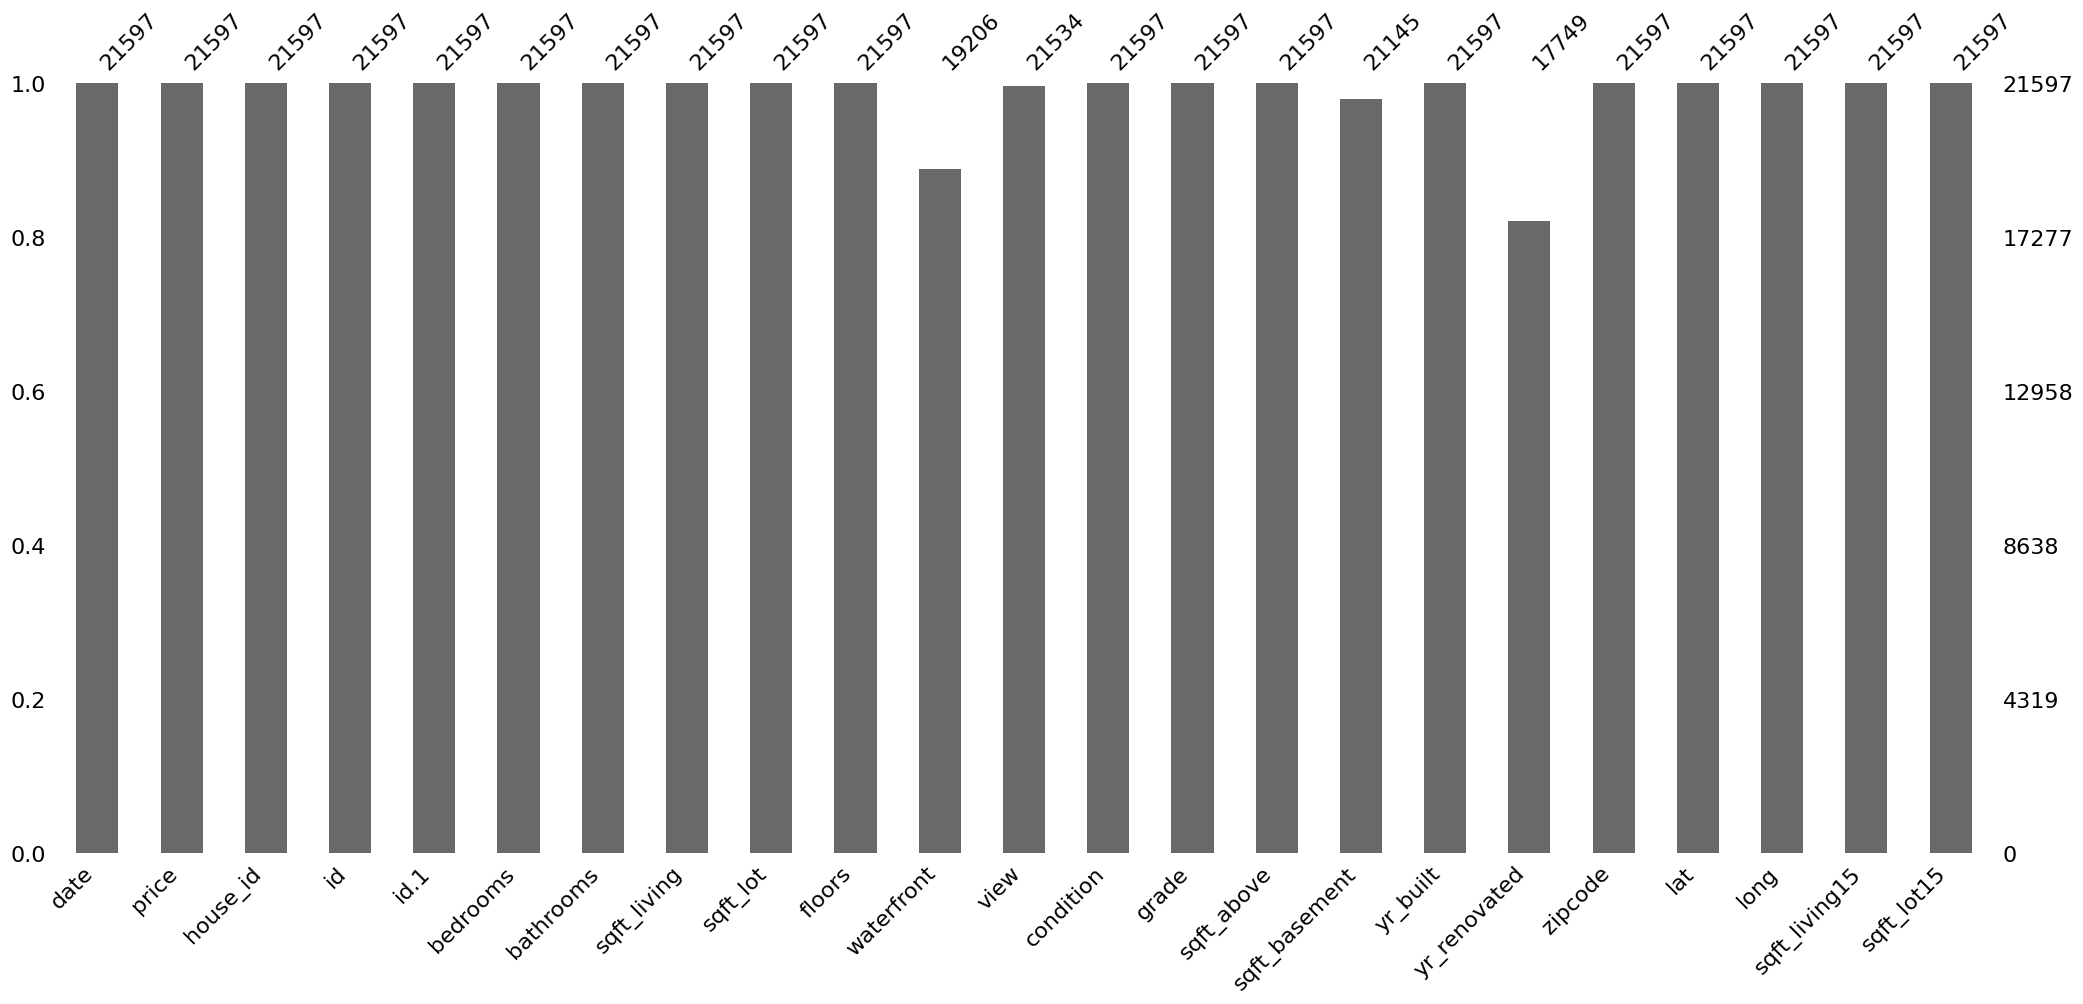

In [43]:
# plotting percentage of missing values per column
msno.bar(df_house)

<Axes: >

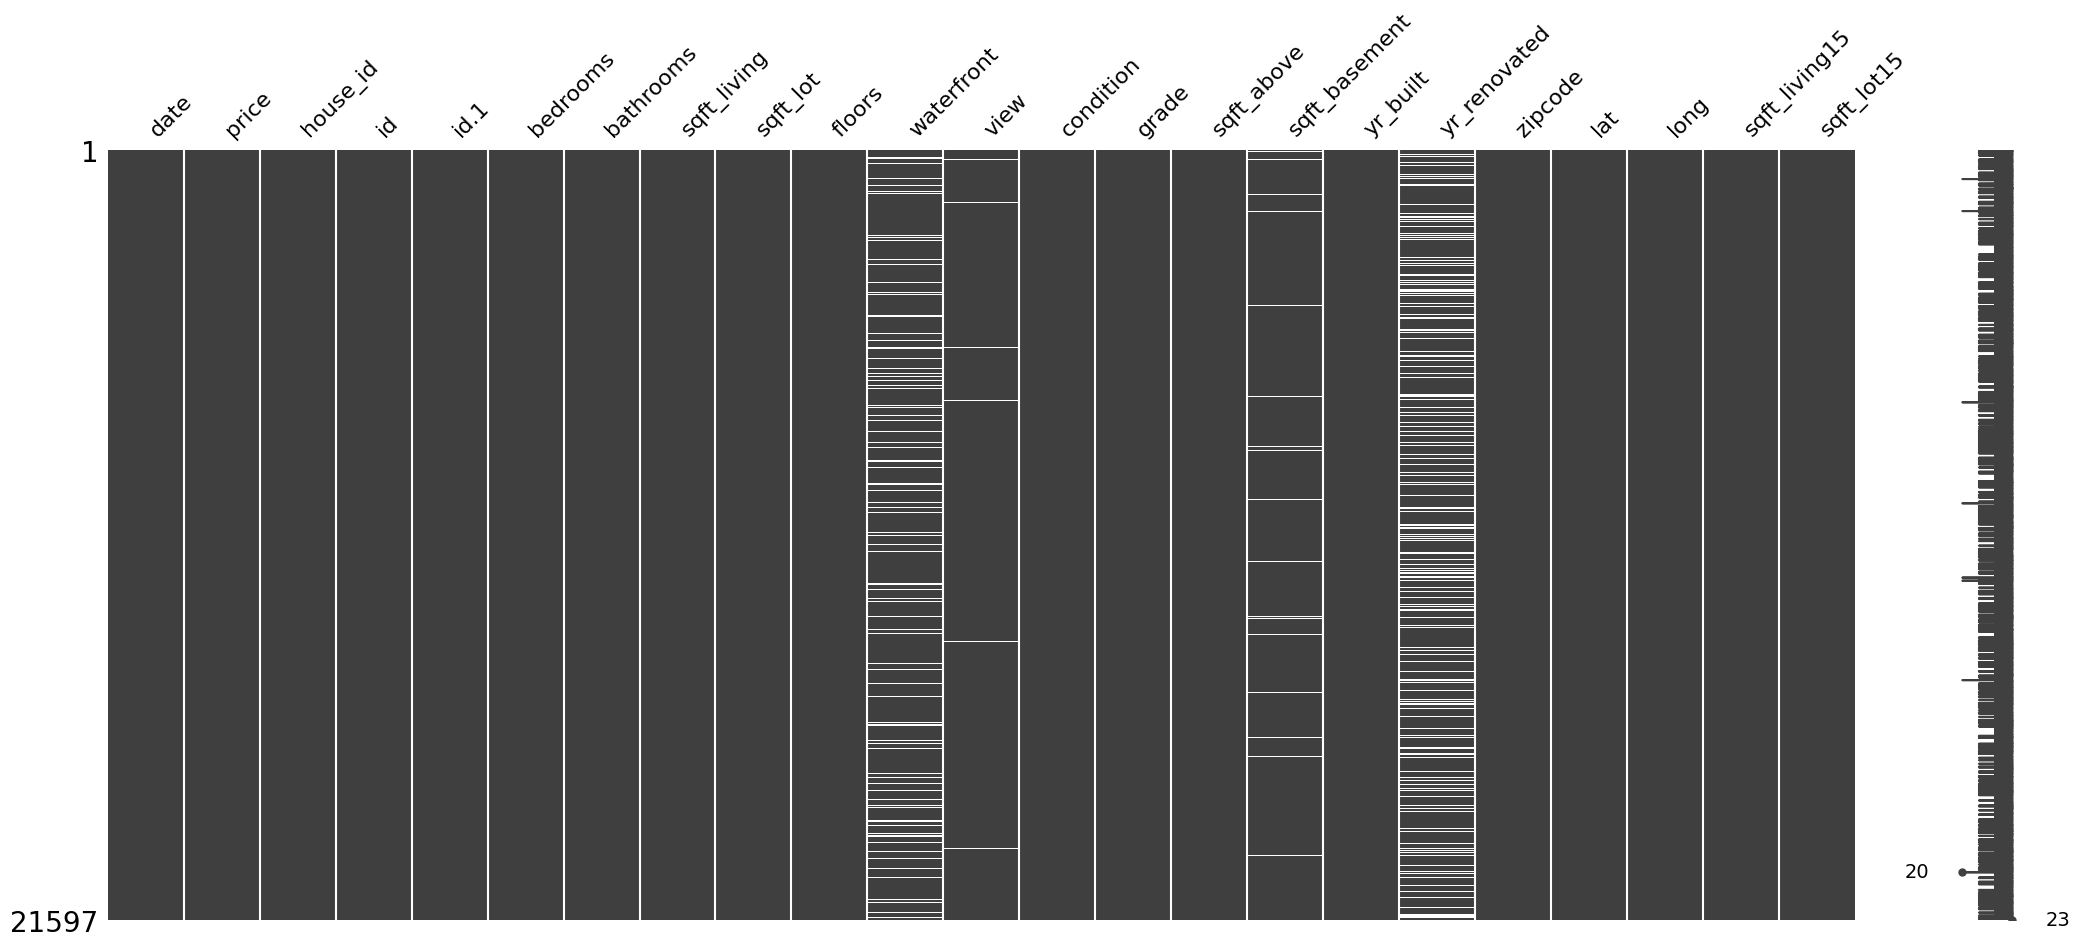

In [44]:
msno.matrix(df_house)

In [45]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
df_house.columns = df_house.columns.str.replace('.','_')
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [47]:
# renaming column
df_house = df_house.rename({'lat':'latitude','long':'longitude',
                            'sqft_living15':'living_space_15_neighbours', 'sqft_lot15':'plotsize_15_neighbours',
                            'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft'}, axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'latitude', 'longitude',
       'living_space_15_neighbours', 'plotsize_15_neighbours'],
      dtype='object')

In [48]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [49]:
df_house.dtypes

date                           object
price                         float64
house_id                        int64
id                              int64
id_1                            int64
bedrooms                      float64
bathrooms                     float64
livingspace_sqft              float64
plotsize_sqft                 float64
floors                        float64
waterfront                    float64
view                          float64
condition                       int64
grade                           int64
sqft_above                    float64
sqft_basement                 float64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
latitude                      float64
longitude                     float64
living_space_15_neighbours    float64
plotsize_15_neighbours        float64
dtype: object

In [50]:
# Convert date to datetime format 
df_house.date = pd.to_datetime(df_house.date)
print(df_house['date'])

0       2015-04-22
1       2014-09-16
2       2014-05-08
3       2014-08-11
4       2015-04-01
           ...    
21592   2014-07-25
21593   2015-03-11
21594   2014-06-24
21595   2014-07-03
21596   2014-10-30
Name: date, Length: 21597, dtype: datetime64[ns]


In [51]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.00,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0.0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,1.75,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0.0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.00,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0.0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.00,1430.0,7599.0,1.5,...,6,1010.0,420.0,1930,0.0,98168,47.4783,-122.265,1290.0,10320.0


In [52]:
# Use fillna to impute missing values
df_house["waterfront"] = df_house.waterfront.fillna(0)

# Replace missing values in "sqft_basement" with values from "sqft_living"
df_house['sqft_basement'].fillna(df_house['livingspace_sqft'], inplace=True)

# turn yr_built and yr_renovated into year datetime
df_house['yr_renovated'] = df_house['yr_renovated'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated).dt.strftime('%Y')
df_house["yr_renovated"] = df_house.yr_renovated.fillna(0)

df_house['yr_built'] = df_house['yr_built'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_built'] = pd.to_datetime(df_house.yr_built).dt.strftime('%Y')

#fix missing values in potential buyers
df_house["view"] = df_house.view.fillna(0)



In [53]:
#round bathroom number and floor number
df_house['bathrooms'] = df_house.bathrooms.round()
df_house['floors'] = df_house.floors.round()

In [54]:
df_house.head(20)

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0,98002,47.3262,-122.214,2060.0,7316.0
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,7,2400.0,0.0,1991,0,98002,47.3262,-122.214,2060.0,7316.0
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,2.0,2060.0,26036.0,1.0,...,8,1160.0,900.0,1947,0,98166,47.4444,-122.351,2590.0,21891.0
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.0,1460.0,43000.0,1.0,...,7,1460.0,0.0,1952,0,98166,47.4434,-122.347,2250.0,20023.0
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,2.0,...,6,1010.0,420.0,1930,0,98168,47.4783,-122.265,1290.0,10320.0
5,2015-03-19,402500.0,3600057,3554,3600057,4.0,2.0,1650.0,3504.0,1.0,...,7,760.0,890.0,1951,2013,98144,47.5803,-122.294,1480.0,3504.0
6,2015-03-30,680000.0,3600072,18507,3600072,4.0,3.0,2220.0,5310.0,1.0,...,7,1170.0,1050.0,1951,0,98144,47.5801,-122.294,1540.0,4200.0
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,7,1990.0,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0
8,2014-07-09,487000.0,5200087,21048,5200087,4.0,2.0,2540.0,5001.0,2.0,...,9,2540.0,0.0,2005,0,98108,47.5423,-122.302,2360.0,6834.0
9,2014-11-12,281000.0,6200017,4330,6200017,3.0,1.0,1340.0,21336.0,2.0,...,5,1340.0,0.0,1945,0,98032,47.4023,-122.273,1340.0,37703.0


<Axes: >

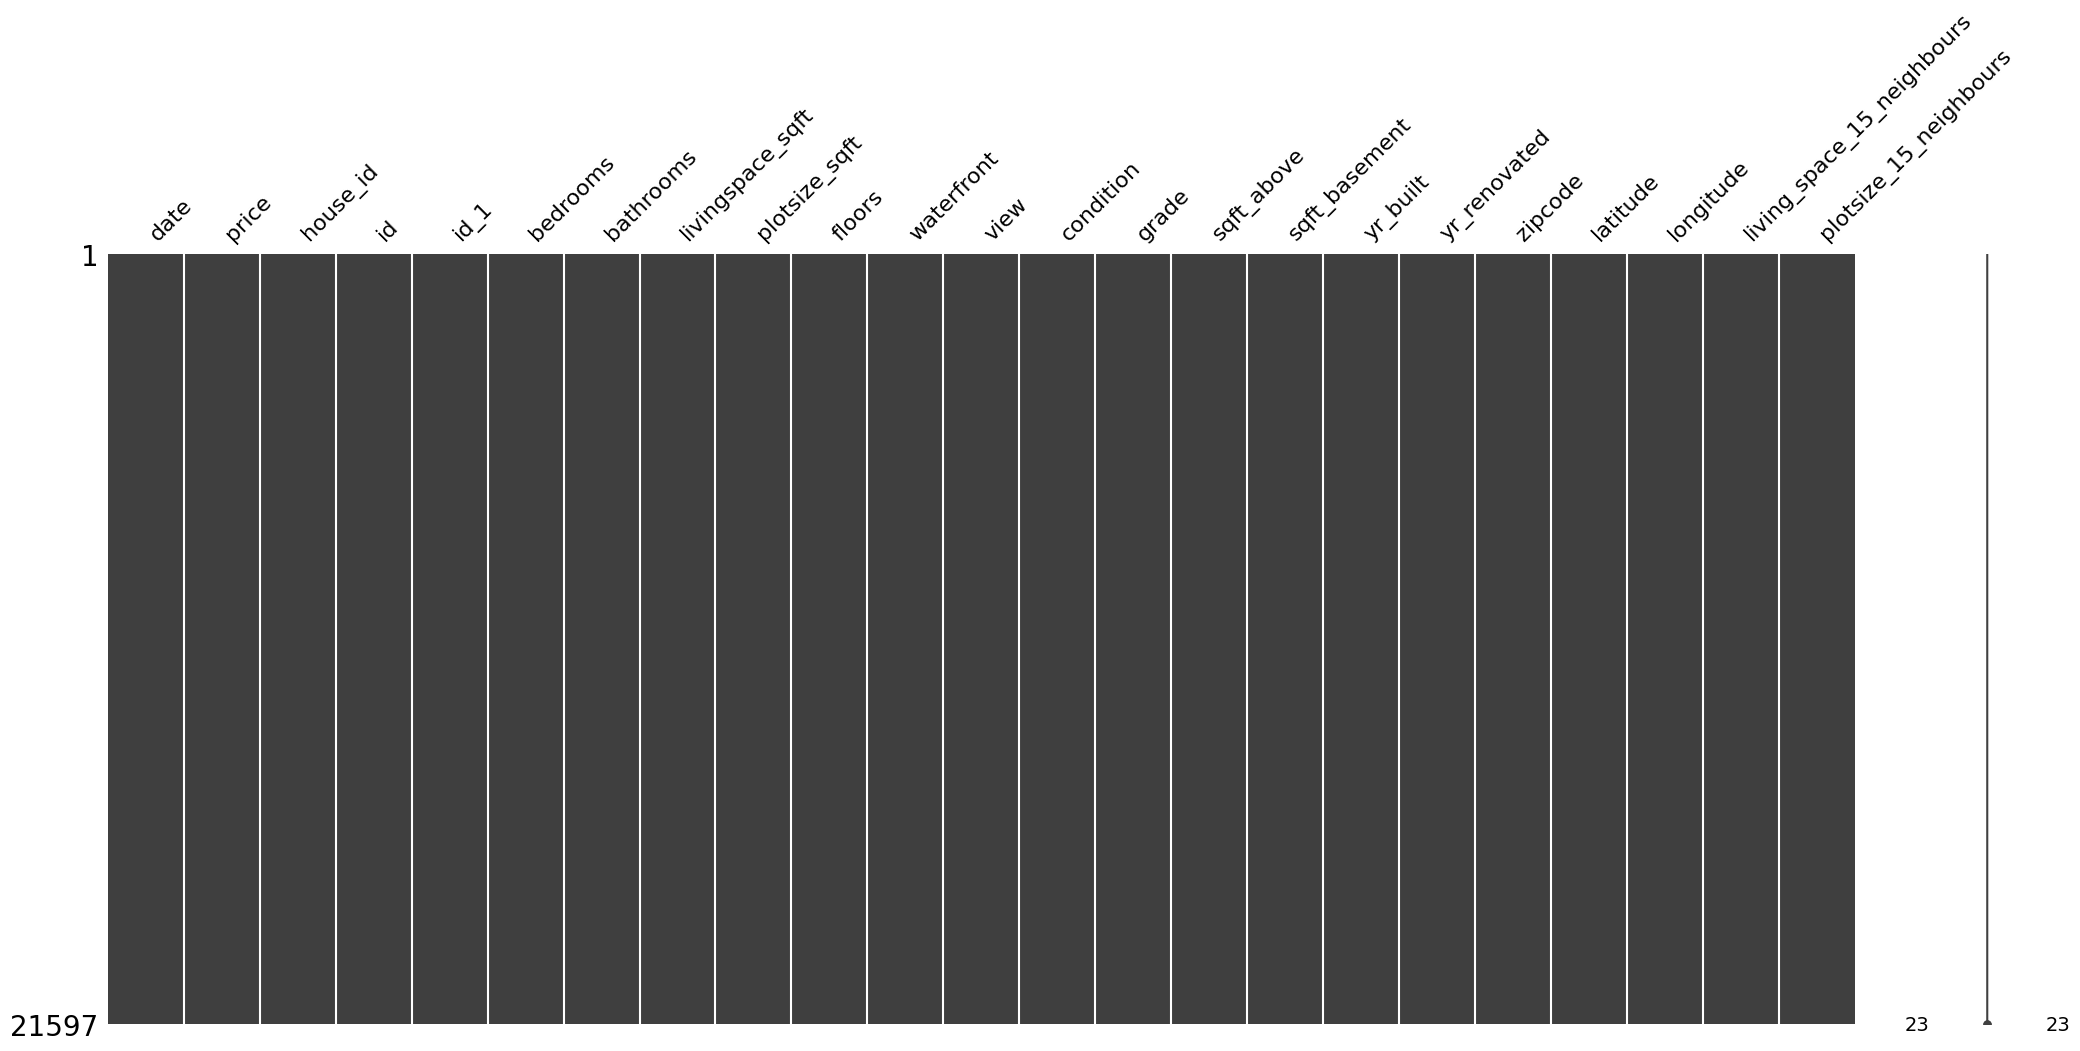

In [55]:
msno.matrix(df_house)

In [58]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        21597 non-null  datetime64[ns]
 1   price                       21597 non-null  float64       
 2   house_id                    21597 non-null  int64         
 3   id                          21597 non-null  int64         
 4   id_1                        21597 non-null  int64         
 5   bedrooms                    21597 non-null  float64       
 6   bathrooms                   21597 non-null  float64       
 7   livingspace_sqft            21597 non-null  float64       
 8   plotsize_sqft               21597 non-null  float64       
 9   floors                      21597 non-null  float64       
 10  waterfront                  21597 non-null  float64       
 11  view                        21597 non-null  float64   

# Data Exploration and Visualization

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import json
import requests

Text(0, 0.5, 'Prices')

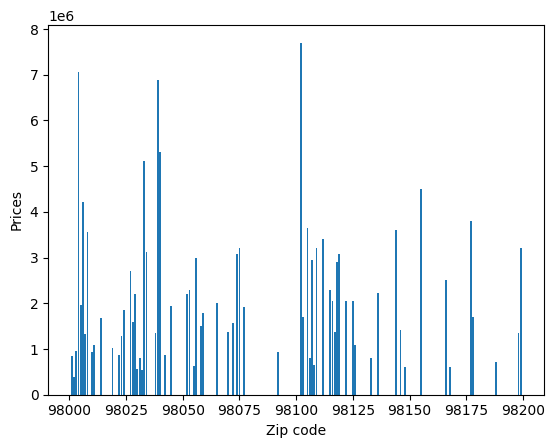

In [70]:
plt.bar(df_house.zipcode,df_house.price)
plt.xlabel('Zip code')
plt.ylabel('Prices')

In [71]:
df_house['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

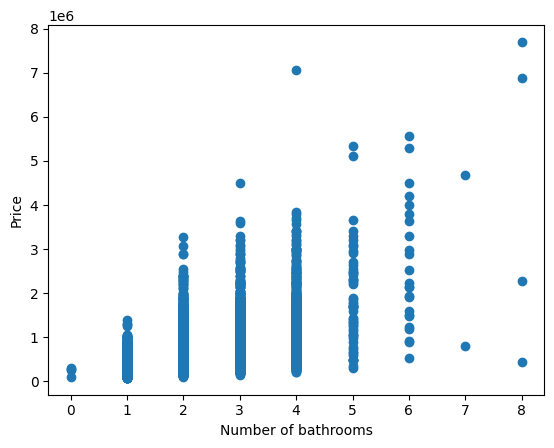

In [72]:
plt.scatter(df_house.bathrooms, df_house.price)
plt.ylabel('Price')
plt.xlabel('Number of bathrooms')
plt.show

Text(0.5, 0, 'grade')

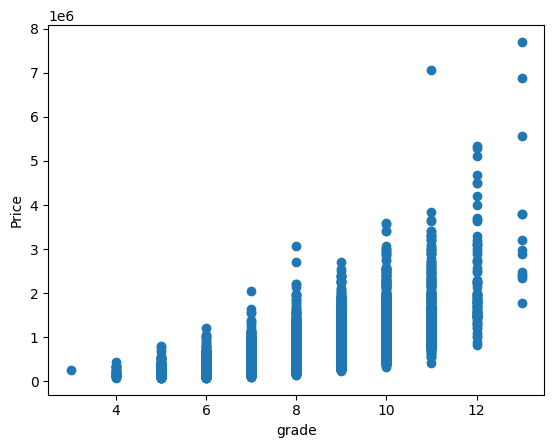

In [73]:
plt.scatter(df_house.grade, df_house.price)
plt.ylabel('Price')
plt.xlabel('grade')


In [74]:
df_house['grade'].describe()

count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

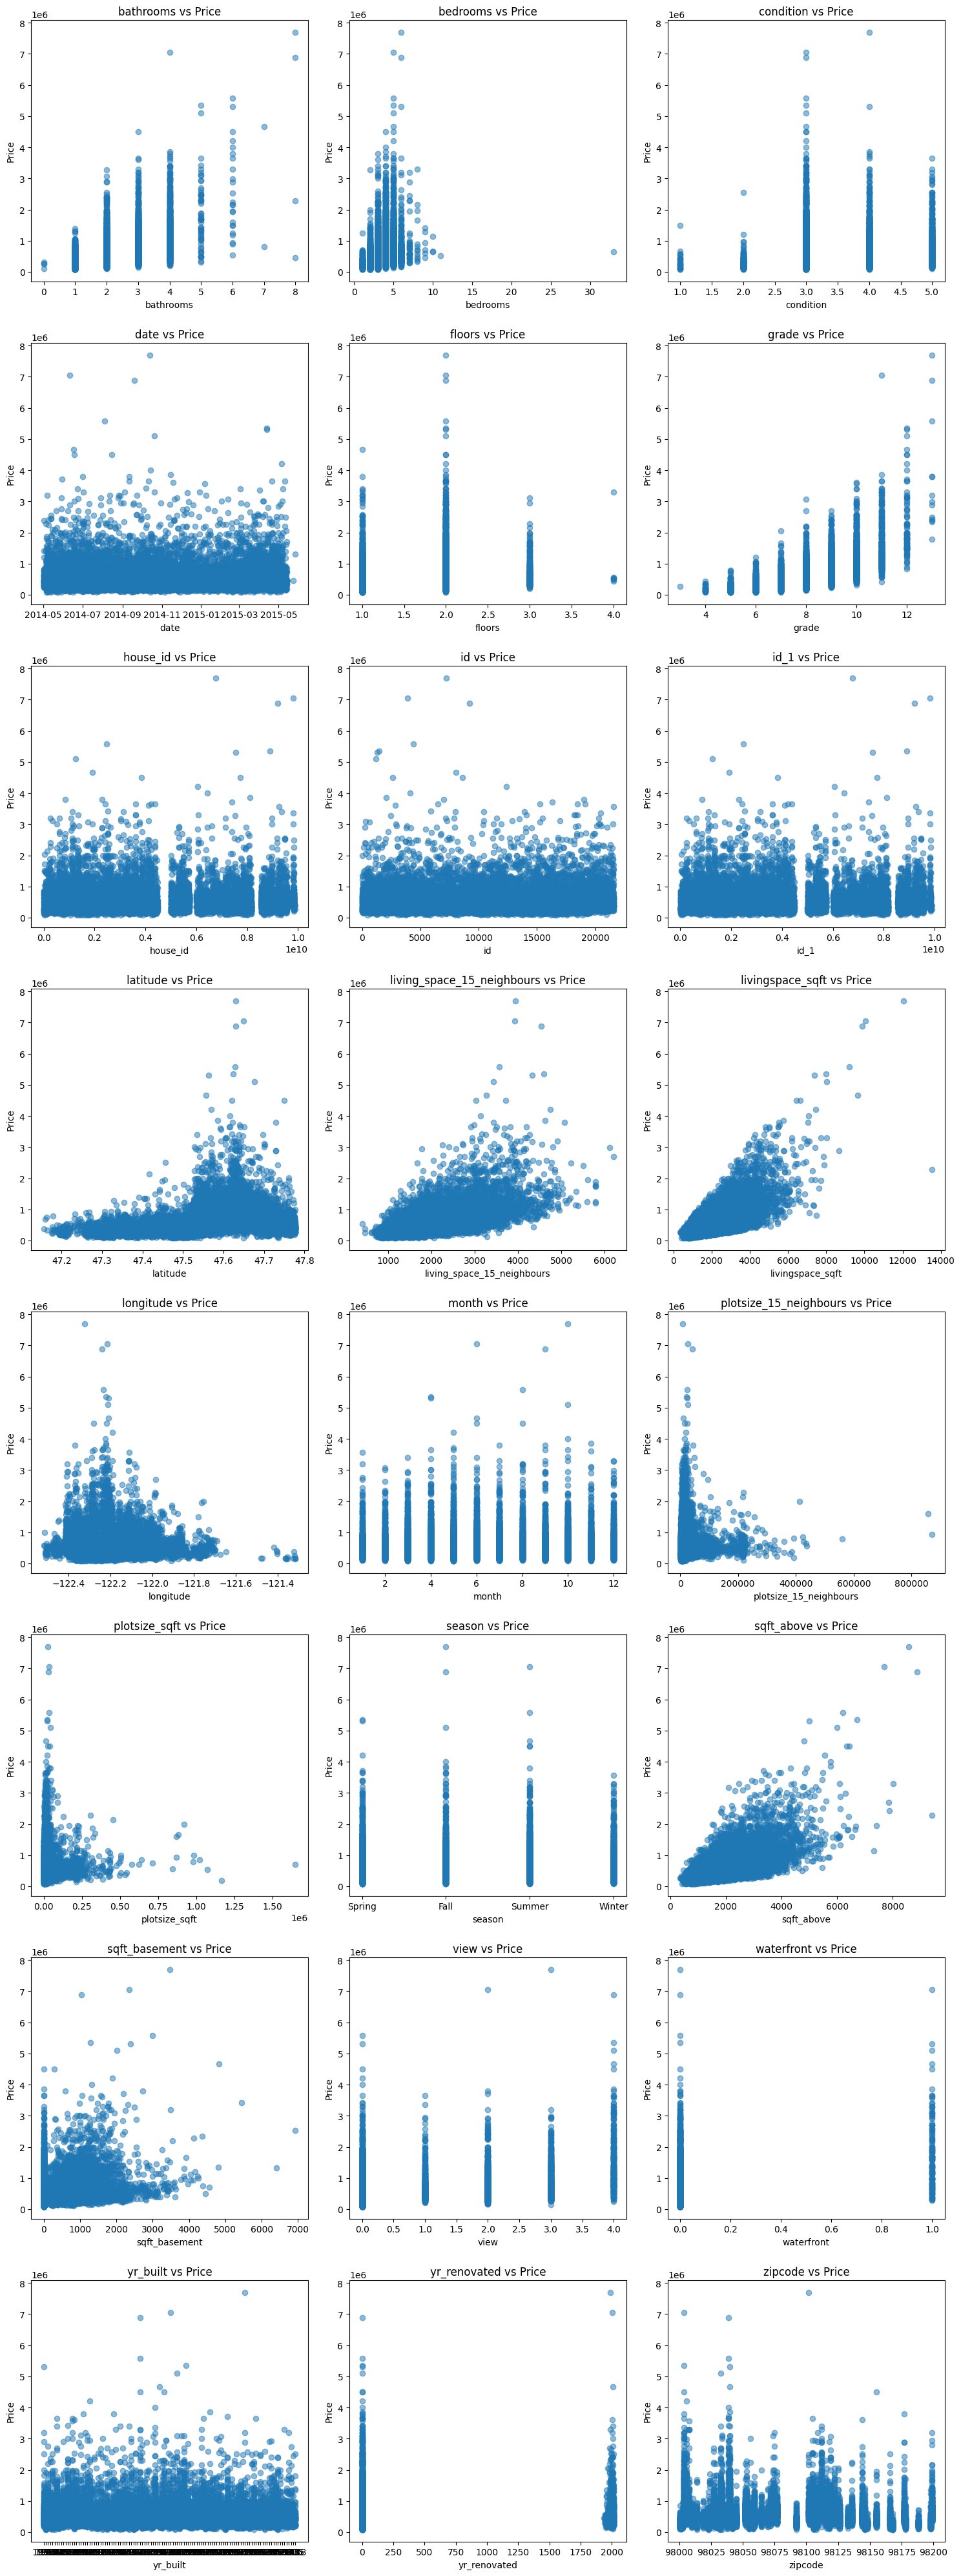

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns excluding 'price'
x_columns = df_house.columns.difference(['price'])

# Calculate the number of rows and columns for the subplots
num_plots = len(x_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot scatter plots for each column against 'price'
for i, col in enumerate(x_columns):
    ax = axes[i]
    ax.scatter(df_house[col], df_house['price'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f'{col} vs Price')

# Remove any unused subplots
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:
df_house

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,0.0,1991,0,98002,47.3262,-122.214,2060.0,7316.0,4,Spring
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,0.0,1991,0,98002,47.3262,-122.214,2060.0,7316.0,9,Fall
2,2014-05-08,647500.0,1200019,6730,1200019,4.0,2.0,2060.0,26036.0,1.0,...,900.0,1947,0,98166,47.4444,-122.351,2590.0,21891.0,5,Spring
3,2014-08-11,400000.0,1200021,8405,1200021,3.0,1.0,1460.0,43000.0,1.0,...,0.0,1952,0,98166,47.4434,-122.347,2250.0,20023.0,8,Summer
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,2.0,...,420.0,1930,0,98168,47.4783,-122.265,1290.0,10320.0,4,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-07-25,365000.0,9842300095,16724,9842300095,5.0,2.0,1600.0,4168.0,2.0,...,0.0,1927,0,98126,47.5297,-122.381,1190.0,4168.0,7,Summer
21593,2015-03-11,380000.0,9842300485,3258,9842300485,2.0,1.0,1040.0,7372.0,1.0,...,200.0,1939,0,98126,47.5285,-122.378,1930.0,5150.0,3,Spring
21594,2014-06-24,339000.0,9842300540,7615,9842300540,3.0,1.0,1100.0,4128.0,1.0,...,380.0,1942,0,98126,47.5296,-122.379,1510.0,4538.0,6,Summer
21595,2014-07-03,399900.0,9895000040,20964,9895000040,2.0,2.0,1410.0,1005.0,2.0,...,510.0,2011,0,98027,47.5446,-122.018,1440.0,1188.0,7,Summer


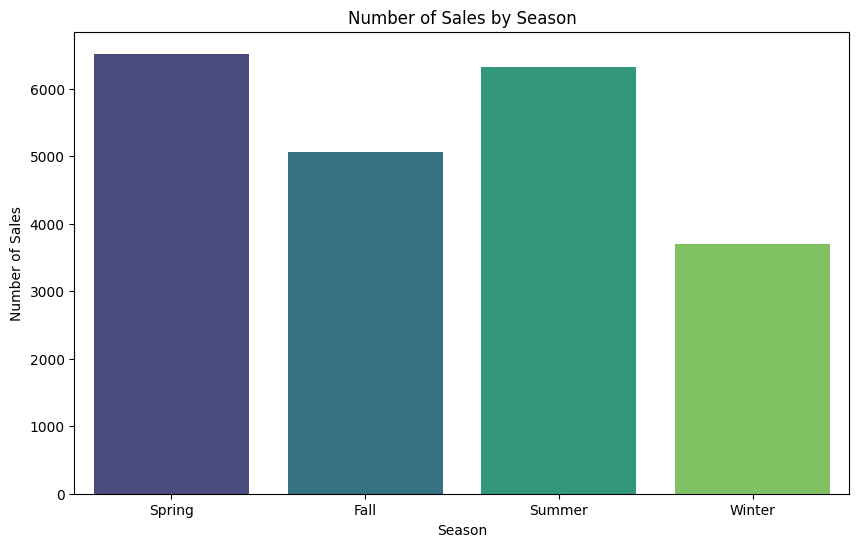

In [79]:
# Timing for Buying
# Extract the month from the date
df_house['month'] = df_house['date'].dt.month

# Create a mapping for months to seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                  6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df_house['season'] = df_house['month'].map(season_mapping)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df_house, palette='viridis')
plt.title('Number of Sales by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sales')


plt.show()


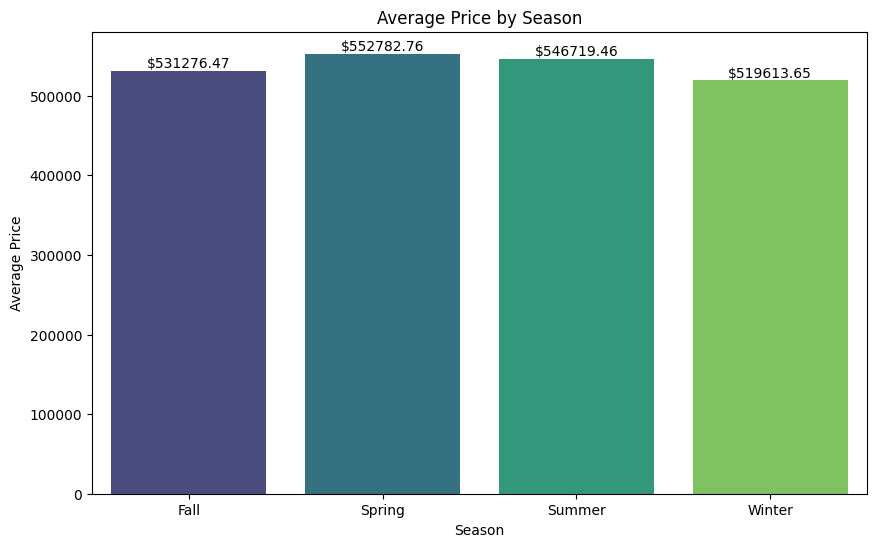

In [67]:
# Calculate the average price for each season
season_avg_price = df_house.groupby('season')['price'].mean()

# Create a bar plot with average prices for each season
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=season_avg_price.index, y=season_avg_price.values, palette='viridis')
plt.title('Average Price by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

# Annotate each bar with the average price value
for i, value in enumerate(season_avg_price.values):
    ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()



In [68]:
# Filter data for properties in safe and social neighborhoods: find social, good neighbourhoods with good infrastructure
safe_neighborhoods = [zipcode1, zipcode2, ...]  # List of zip codes
filtered_neighborhoods = df_house[
    df_house['zipcode'].isin(safe_neighborhoods)
]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', hue='yr_renovated', data=filtered_neighborhoods, palette='coolwarm')
plt.title('Price vs. Grade for Unrenovated Properties in Safe Neighborhoods')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend(title='Renovated')
plt.show()


NameError: name 'zipcode1' is not defined

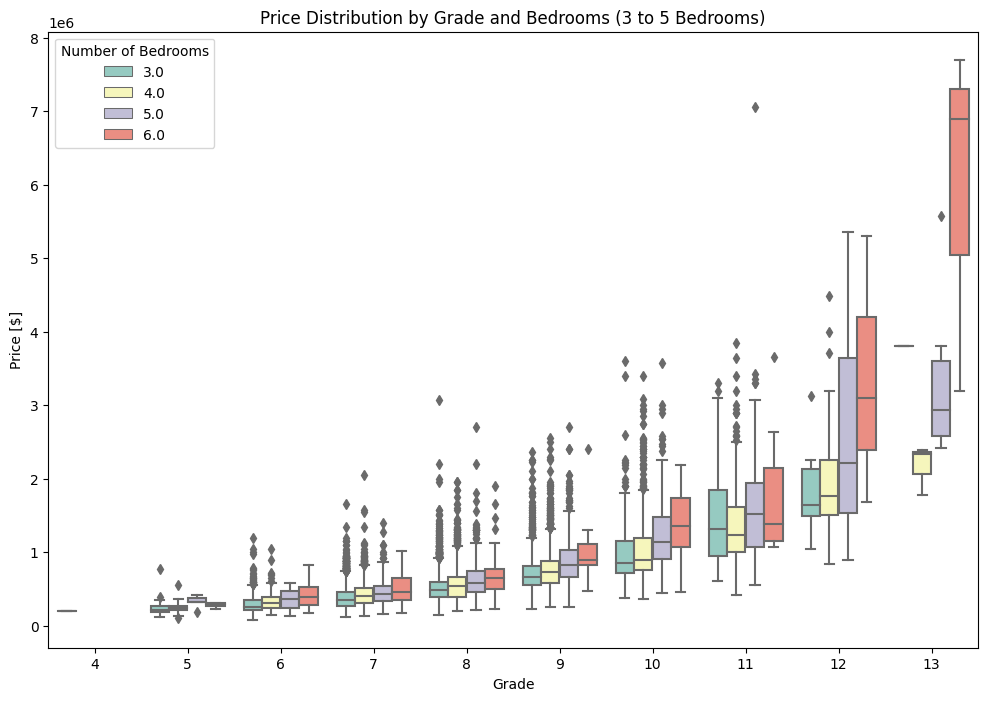

In [ ]:
#3. Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house[
    (df_house['bedrooms'] >= 3) & (df_house['bedrooms'] <= 6)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 5 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()



In [83]:
# create new dataframe with houses in lower 25% range of prices

df_house_25 = df_house[df_house['price'] <= df_house['price'].quantile(0.25)].copy()

df_house_25

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
0,2015-04-22,300000.0,1000102,2496,1000102,6.0,3.0,2400.0,9373.0,2.0,...,0.0,1991,0,98002,47.3262,-122.214,2060.0,7316.0,4,Spring
1,2014-09-16,280000.0,1000102,2495,1000102,6.0,3.0,2400.0,9373.0,2.0,...,0.0,1991,0,98002,47.3262,-122.214,2060.0,7316.0,9,Fall
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,2.0,...,420.0,1930,0,98168,47.4783,-122.265,1290.0,10320.0,4,Spring
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0,2,Winter
9,2014-11-12,281000.0,6200017,4330,6200017,3.0,1.0,1340.0,21336.0,2.0,...,0.0,1945,0,98032,47.4023,-122.273,1340.0,37703.0,11,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,2014-08-28,300000.0,9835800320,11318,9835800320,4.0,2.0,2080.0,8750.0,1.0,...,750.0,1967,0,98032,47.3749,-122.291,1790.0,8750.0,8,Summer
21580,2014-12-03,247000.0,9835800750,4418,9835800750,3.0,2.0,1640.0,7630.0,1.0,...,460.0,1968,0,98032,47.3739,-122.290,1930.0,7630.0,12,Winter
21581,2015-02-04,215000.0,9835800840,5409,9835800840,4.0,2.0,1470.0,7000.0,1.0,...,0.0,1967,0,98032,47.3742,-122.289,1640.0,7000.0,2,Winter
21582,2014-06-25,245700.0,9835801000,11251,9835801000,3.0,2.0,1640.0,8400.0,1.0,...,460.0,1968,0,98032,47.3733,-122.289,1600.0,8120.0,6,Summer


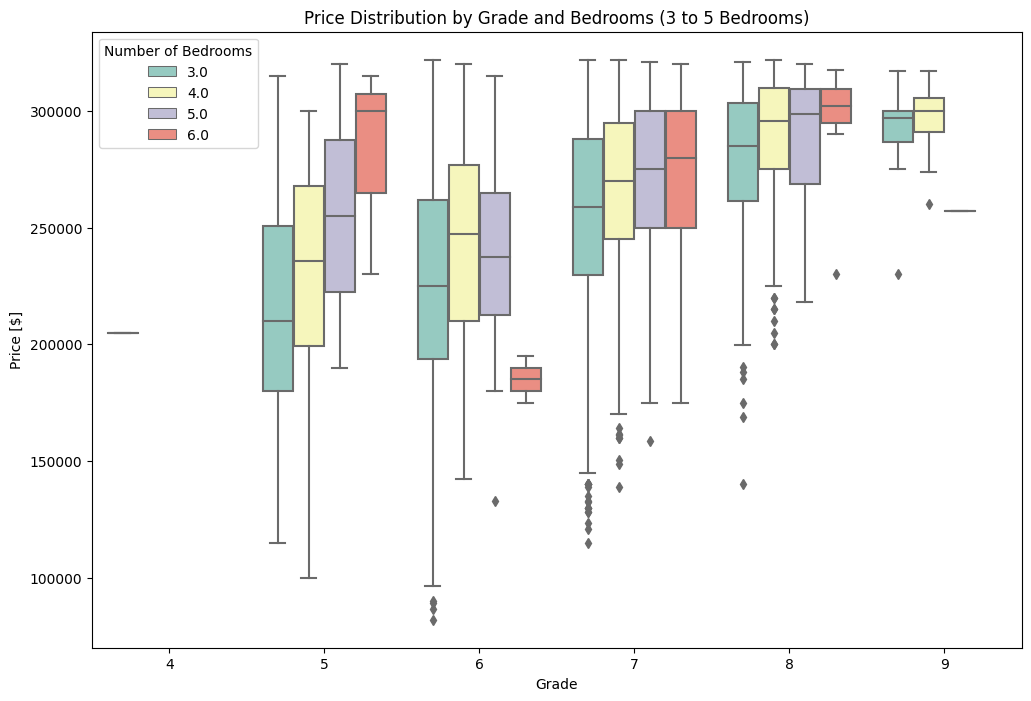

In [159]:
#3. Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house_25[
    (df_house_25['bedrooms'] >= 3) & (df_house_25['bedrooms'] <= 6)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 5 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()

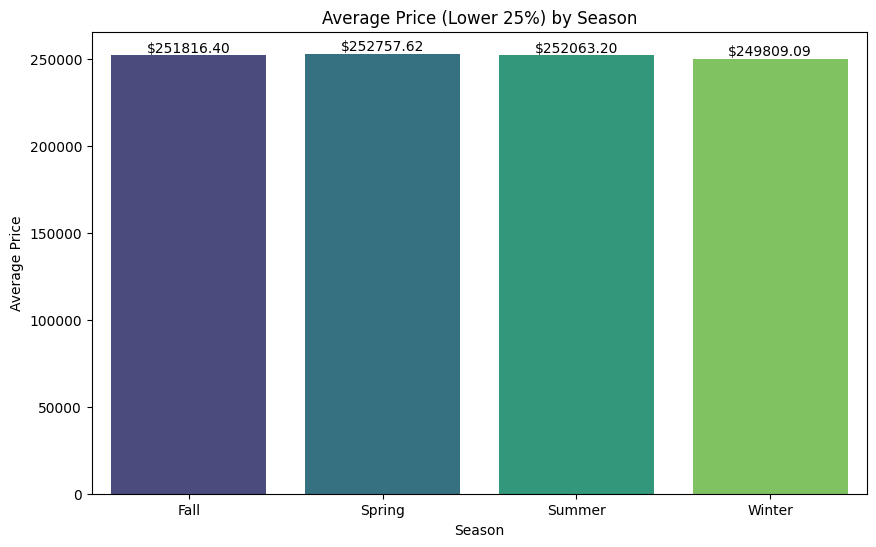

In [82]:
# Calculate the 25th percentile price
lower_25_price = df_house['price'].quantile(0.25)

# Filter data for houses within the lower 25% of prices
lower_25_houses = df_house[df_house['price'] <= lower_25_price]

# Calculate the average price for each season within the lower 25% subset
lower_25_season_avg_price = lower_25_houses.groupby('season')['price'].mean()

# Create a bar plot with average prices for each season (lower 25% houses)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lower_25_season_avg_price.index, y=lower_25_season_avg_price.values, palette='viridis')
plt.title('Average Price (Lower 25%) by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

# Annotate each bar with the average price value
for i, value in enumerate(lower_25_season_avg_price.values):
    ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()

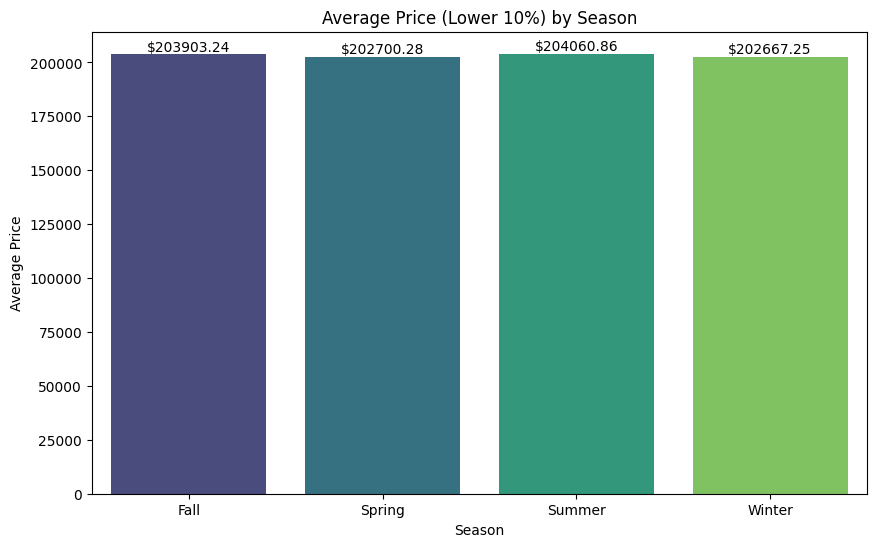

In [ ]:
# Calculate the 10th percentile price
lower_10_price = df_house['price'].quantile(0.10)

# Filter data for houses within the lower 10% of prices
lower_10_houses = df_house[df_house['price'] <= lower_10_price]

# Calculate the average price for each season within the lower 10% subset
lower_10_season_avg_price = lower_10_houses.groupby('season')['price'].mean()

# Create a bar plot with average prices for each season (lower 10% houses)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lower_10_season_avg_price.index, y=lower_10_season_avg_price.values, palette='viridis')
plt.title('Average Price (Lower 10%) by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')

# Annotate each bar with the average price value
for i, value in enumerate(lower_10_season_avg_price.values):
    ax.text(i, value, f"${value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.show()

/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_10367/2130347479.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



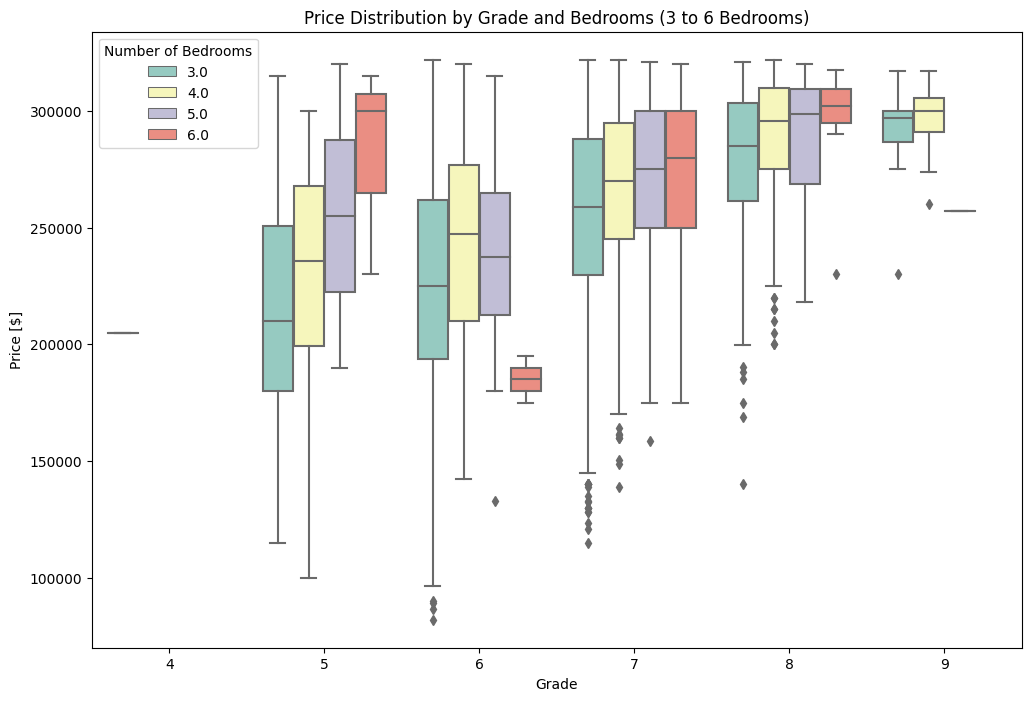

         house_id  bedrooms  bathrooms  grade     price  zipcode
3439   1443500305       6.0        2.0      6  194990.0    98118
12736  5132000140       6.0        1.0      6  175000.0    98106


In [161]:
#3. Same plot, smaller dataframe: Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house_25[
    (df_house_25['bedrooms'] >= 3) & (df_house['bedrooms'] <= 6)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 6 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()

# Display the properties that correspond to the data points in the box plot
selected_properties = filtered_bedrooms[
    (filtered_bedrooms['grade'] == 6) & (filtered_bedrooms['bedrooms'] == 6)
]
print(selected_properties[['house_id', 'bedrooms', 'bathrooms', 'grade', 'price', 'zipcode']])


In [85]:
# Specify the house_id you want to retrieve information for
specific_house_id = 1443500305

# Filter data for the specific house_id
specific_house = df_house_25[df_house_25['house_id'] == specific_house_id]

# Display the nformation for the specific house_id
specific_house

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
3439,2014-10-13,194990.0,1443500305,5316,1443500305,6.0,2.0,1560.0,7144.0,1.0,...,500.0,1913,0,98118,47.5335,-122.272,1300.0,6232.0,10,Fall


In [91]:
df_sorted = df_house_25.sort_values(by='price', ascending=True)

df_sorted.head()


,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
61,2014-05-06,78000.0,40000362,15280,40000362,2.0,1.0,780.0,16344.0,1.0,...,0.0,1942,0,98168,47.4739,-122.280,1700.0,10387.0,5,Spring
19077,2014-05-23,80000.0,8658300340,466,8658300340,1.0,1.0,430.0,5050.0,1.0,...,0.0,1912,0,98014,47.6499,-121.909,1200.0,7500.0,5,Spring
8075,2015-03-24,81000.0,3028200080,16185,3028200080,2.0,1.0,730.0,9975.0,1.0,...,0.0,1943,0,98168,47.4808,-122.315,860.0,9000.0,3,Spring
10674,2014-11-05,82000.0,3883800011,8268,3883800011,3.0,1.0,860.0,10426.0,1.0,...,0.0,1954,0,98146,47.4987,-122.341,1140.0,11250.0,11,Fall
3930,2014-05-08,82500.0,1623049041,2140,1623049041,2.0,1.0,520.0,22334.0,1.0,...,0.0,1951,0,98168,47.4799,-122.296,1572.0,10570.0,5,Spring


In [87]:
# Specify the house_id you want to retrieve information for
specific_price = 

# Filter data for the specific house_id
specific_price_house = df_house_25[df_house_25['house_id'] == specific_price]

# Display the nformation for the specific house_id
specific_price_house

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season


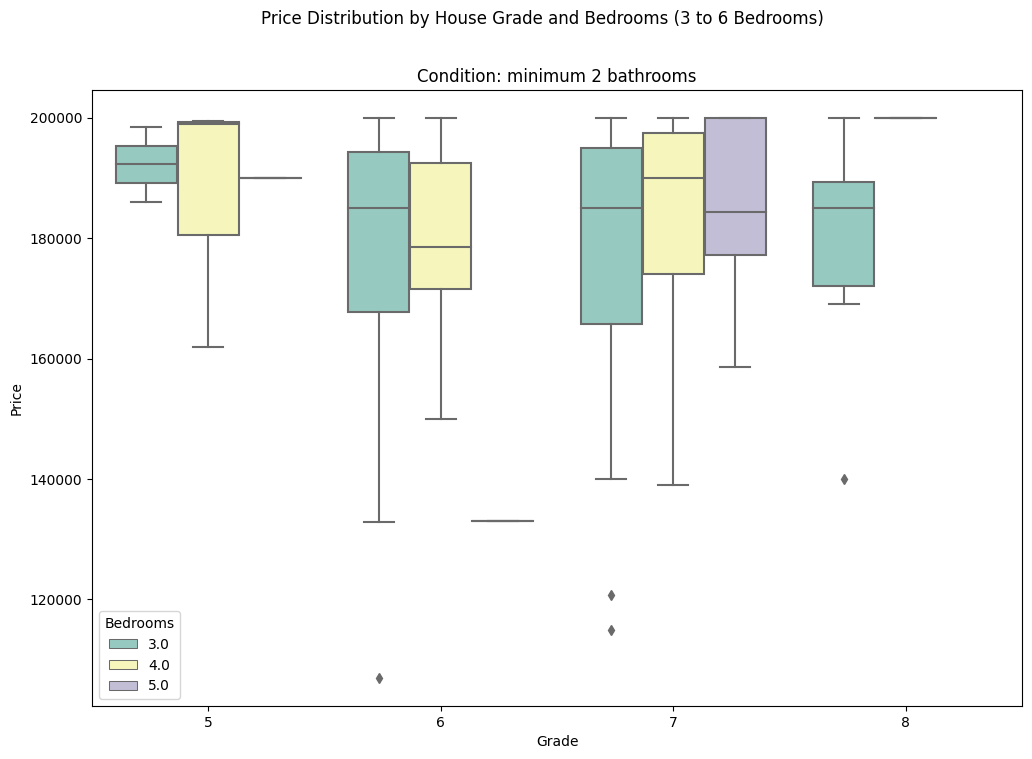

         house_id     price  bedrooms  bathrooms  grade  zipcode
3417   1442800150  199950.0       3.0        3.0      8    98038
14153  6143000020  175000.0       3.0        2.0      8    98001
14852  6669020290  169000.0       3.0        2.0      8    98032
16337  7399100040  185000.0       3.0        2.0      8    98055
16338  7399100210  140000.0       3.0        2.0      8    98055
19371  8728100775  190500.0       3.0        2.0      8    98144
20277  9264901680  188000.0       3.0        2.0      8    98023


In [140]:
#lets do the same with bathrooms and bedrooms
# Filter data for properties with 3 to 5 bedrooms and at least 2 bathrooms
filtered_properties = filtered_houses[
    (filtered_houses['bedrooms'] >= 3) & (filtered_houses['bedrooms'] <= 5) & (filtered_houses['bathrooms'] >= 2)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_properties, palette='Set3')
plt.title ('Condition: minimum 2 bathrooms')
plt.suptitle('Price Distribution by House Grade and Bedrooms (3 to 6 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

# Display the properties that correspond to the data points in the box plot
selected_properties = filtered_properties[
    (filtered_properties['grade'] == 8) & (filtered_properties['bedrooms'] == 3)
]
print(selected_properties[['house_id', 'price', 'bedrooms', 'bathrooms', 'grade', 'zipcode']])


In [118]:
# create new dataframe with houses in lower 15% range of prices

df_house_15 = df_house[df_house['price'] <= df_house['price'].quantile(0.15)].copy()

df_house_15

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
4,2015-04-01,235000.0,2800031,8801,2800031,3.0,1.0,1430.0,7599.0,2.0,...,420.0,1930,0,98168,47.4783,-122.265,1290.0,10320.0,4,Spring
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0,2,Winter
10,2014-11-04,239000.0,7200080,16702,7200080,4.0,2.0,1980.0,10585.0,2.0,...,0.0,1924,0,98055,47.4836,-122.214,1360.0,7810.0,11,Fall
11,2014-10-16,150000.0,7200179,16801,7200179,2.0,1.0,840.0,12750.0,1.0,...,0.0,1925,0,98055,47.4840,-122.211,1480.0,6969.0,10,Fall
12,2015-04-24,175000.0,7200179,16802,7200179,2.0,1.0,840.0,12750.0,1.0,...,0.0,1925,0,98055,47.4840,-122.211,1480.0,6969.0,4,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21471,2014-06-27,260000.0,9828200460,6340,9828200460,2.0,1.0,700.0,4800.0,1.0,...,0.0,1922,0,98122,47.6147,-122.300,1440.0,4800.0,6,Summer
21580,2014-12-03,247000.0,9835800750,4418,9835800750,3.0,2.0,1640.0,7630.0,1.0,...,460.0,1968,0,98032,47.3739,-122.290,1930.0,7630.0,12,Winter
21581,2015-02-04,215000.0,9835800840,5409,9835800840,4.0,2.0,1470.0,7000.0,1.0,...,0.0,1967,0,98032,47.3742,-122.289,1640.0,7000.0,2,Winter
21582,2014-06-25,245700.0,9835801000,11251,9835801000,3.0,2.0,1640.0,8400.0,1.0,...,460.0,1968,0,98032,47.3733,-122.289,1600.0,8120.0,6,Summer


/var/folders/lh/r0hywxdj02j3b58tdn1pfkq40000gn/T/ipykernel_10367/3369972692.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_bedrooms = df_house_15[


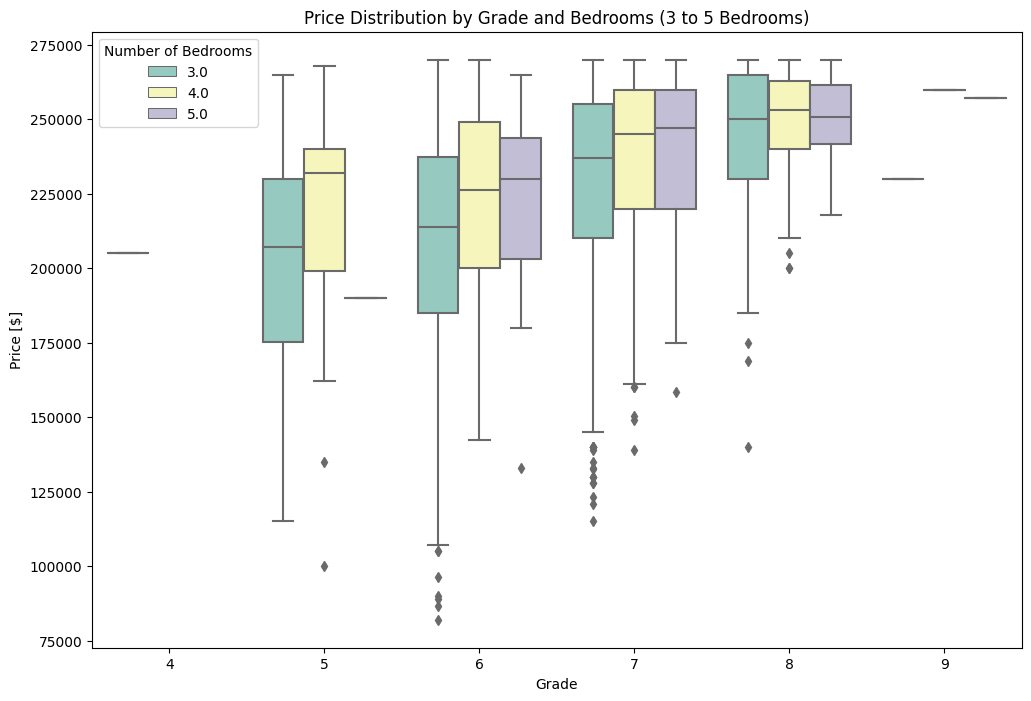

         house_id  bedrooms  grade     price  zipcode
10        7200080       4.0      6  239000.0    98055
44       16000545       4.0      6  250000.0    98002
71       42000245       4.0      6  171000.0    98188
225     123039333       4.0      6  240000.0    98106
268     126059021       4.0      6  200000.0    98072
...           ...       ...    ...       ...      ...
19325  8699100160       4.0      6  250000.0    98002
19637  8856004400       4.0      6  235000.0    98001
19878  8945000260       4.0      6  209950.0    98023
20926  9476200485       4.0      6  261490.0    98056
21021  9500900430       4.0      6  265000.0    98002

[90 rows x 5 columns]


In [94]:
#3. Same plot, smaller dataframe: Insights on Property Grade and Bedrooms: Box plot
# Filter data for properties with 3 to 5 bedrooms
filtered_bedrooms = df_house_15[
    (df_house_15['bedrooms'] >= 3) & (df_house['bedrooms'] <= 5)
]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='price', hue='bedrooms', data=filtered_bedrooms, palette='Set3')
plt.title('Price Distribution by Grade and Bedrooms (3 to 5 Bedrooms)')
plt.xlabel('Grade')
plt.ylabel('Price [$]')
plt.legend(title='Number of Bedrooms')
plt.show()

# Display the properties that correspond to the data points in the box plot
selected_properties = filtered_bedrooms[
    (filtered_bedrooms['grade'] == 6) & (filtered_bedrooms['bedrooms'] == 4)
]
print(selected_properties[['house_id', 'bedrooms', 'grade', 'price', 'zipcode']])

In [127]:
# Specify the house_id you want to retrieve information for
specific_house_id = 7227800065

# Filter data for the specific house_id
specific_house = df_house_25[df_house_25['house_id'] == specific_house_id]

# Display the nformation for the specific house_id
specific_house

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
15940,2014-10-16,199000.0,7227800065,14706,7227800065,4.0,2.0,1440.0,9477.0,1.0,...,0.0,1943,0,98056,47.5093,-122.182,1440.0,9546.0,10,Fall


In [133]:
#sort by bedroom number, bathroom number and grade 


filtered_houses = df_house_15[
    (df_house_15['bedrooms'] >= 3) &
    (df_house_15['bathrooms'] >= 2) &
    (df_house_15['grade'] > 3) &
    (df_house_15['price'] <= 200000)
].copy()
filtered_houses



,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
7,2015-02-24,178000.0,3800008,3198,3800008,5.0,2.0,1990.0,18200.0,1.0,...,0.0,1960,0,98178,47.4938,-122.262,1860.0,8658.0,2,Winter
71,2014-06-13,171000.0,42000245,19548,42000245,4.0,2.0,1520.0,19672.0,1.0,...,500.0,1920,0,98188,47.4683,-122.281,1810.0,7840.0,6,Summer
96,2014-11-20,190000.0,84000245,3100,84000245,3.0,2.0,1100.0,9452.0,1.0,...,0.0,1942,0,98146,47.4864,-122.337,1350.0,9452.0,11,Fall
145,2015-02-24,115000.0,104500730,14409,104500730,3.0,2.0,1080.0,7942.0,1.0,...,0.0,1981,0,98023,47.3141,-122.355,1380.0,8244.0,2,Winter
209,2014-08-19,169000.0,121039038,14035,121039038,3.0,2.0,1470.0,18459.0,2.0,...,0.0,1916,0,98023,47.3302,-122.360,1750.0,16074.0,8,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2015-03-23,178500.0,9407102460,3138,9407102460,3.0,2.0,1120.0,10450.0,1.0,...,0.0,1973,0,98045,47.4418,-121.772,1250.0,10414.0,3,Spring
20778,2014-11-07,195000.0,9407110710,2492,9407110710,3.0,2.0,1510.0,8400.0,1.0,...,530.0,1979,0,98045,47.4476,-121.771,1500.0,10125.0,11,Fall
21020,2014-10-21,200000.0,9500900135,623,9500900135,3.0,2.0,1210.0,10588.0,1.0,...,0.0,1958,0,98002,47.2876,-122.212,1408.0,10588.0,10,Fall
21246,2014-12-29,185000.0,9542802000,15970,9542802000,3.0,2.0,1130.0,7000.0,1.0,...,0.0,1978,0,98023,47.3070,-122.372,1830.0,8880.0,12,Winter


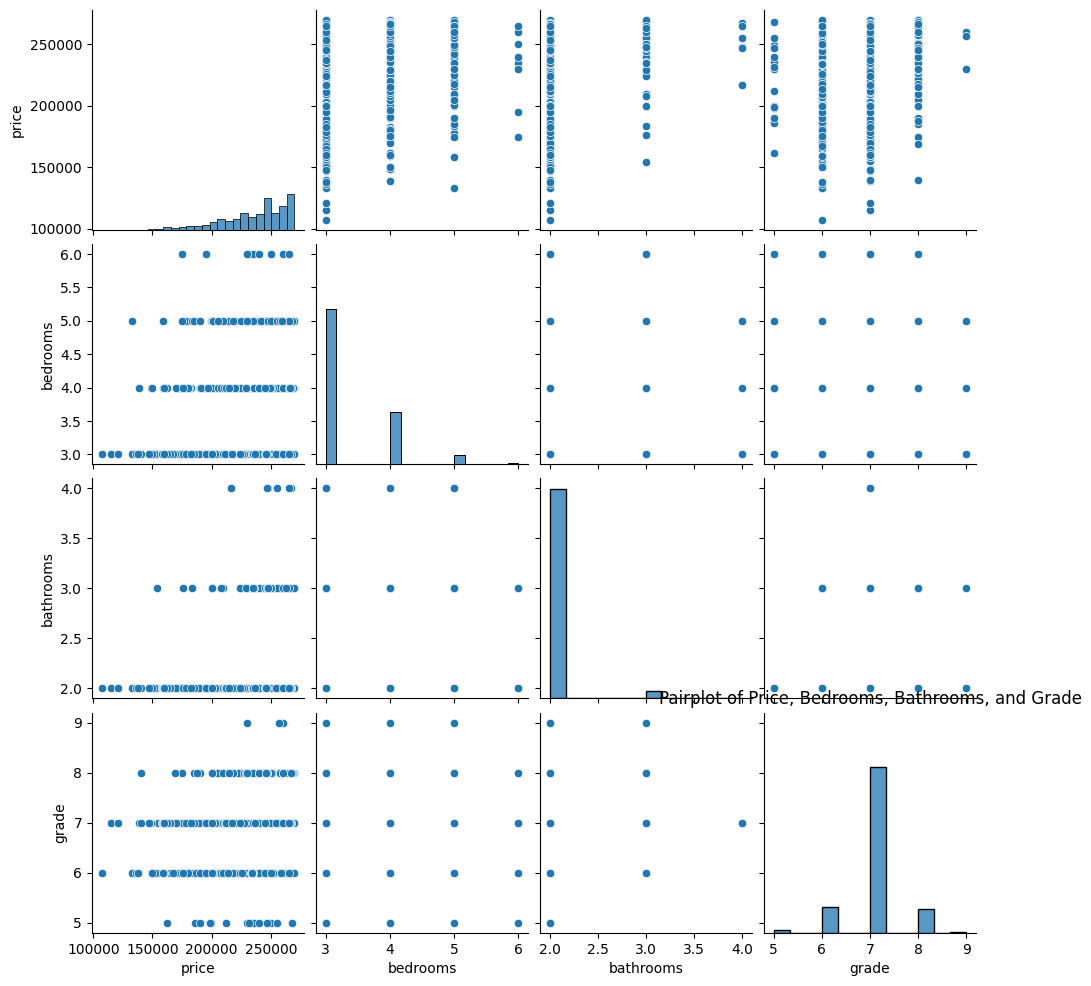

In [99]:
# Pairplot to visualize relationships
sns.pairplot(filtered_houses[['price', 'bedrooms', 'bathrooms', 'grade']])
plt.title("Pairplot of Price, Bedrooms, Bathrooms, and Grade")
plt.show()

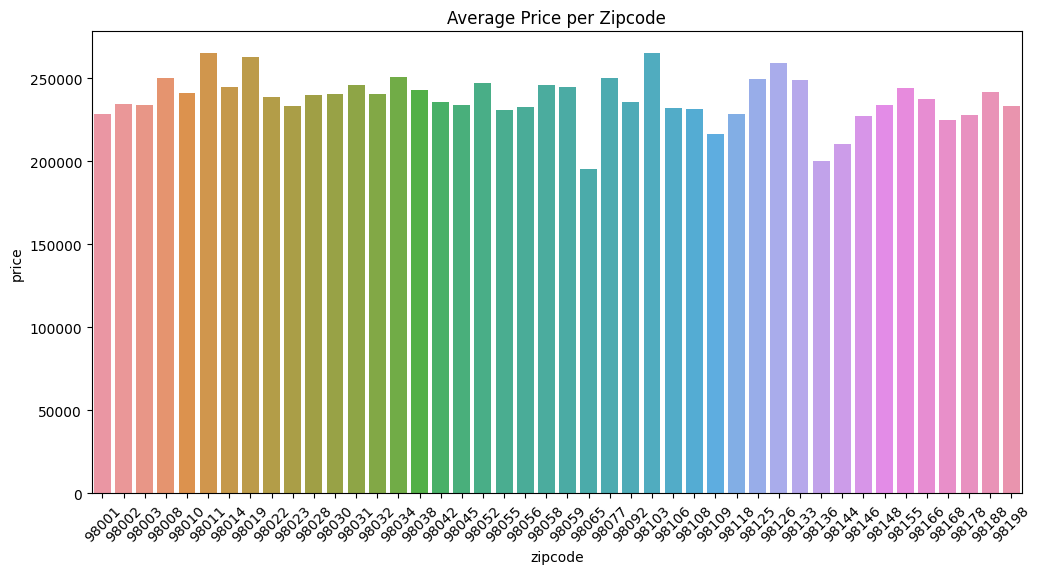

In [100]:
# Bar plot to visualize average price per zipcode
avg_price_by_zip = filtered_houses.groupby('zipcode')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_zip, x='zipcode', y='price')
plt.title("Average Price per Zipcode")
plt.xticks(rotation=45)
plt.show()

In [101]:
import plotly.express as px

# Create a heatmap using Plotly Express
heatmap_fig = px.imshow(avg_price_by_zip.pivot_table(index='zipcode', values='price'))
heatmap_fig.update_layout(title="Average Price Heatmap by Zipcode")
heatmap_fig.show()

In [134]:
import plotly.graph_objs as go

# Define the latitude and longitude values for each zipcode (you might need to replace this with actual coordinates)
zipcode_coords = avg_price_by_zip.merge(filtered_houses[['zipcode', 'latitude', 'longitude']].drop_duplicates(), on='zipcode')

# Create a heatmap layer using Plotly Graph Objects
heatmap_layer = go.Densitymapbox(lat=zipcode_coords['latitude'], lon=zipcode_coords['longitude'], z=zipcode_coords['price'],
                                 radius=20, colorscale="Viridis", showscale=True)

# Create the base map layout
layout = go.Layout(
    mapbox_style="carto-positron",
    mapbox_zoom=9,
    mapbox_center={"lat": filtered_houses['latitude'].mean(), "lon": filtered_houses['longitude'].mean()},
    title="Average Price Heatmap on Geographical Map"
)

# Combine the heatmap layer and base layout in a Figure
heatmap_map_fig = go.Figure(data=[heatmap_layer], layout=layout)
heatmap_map_fig.show()



In [141]:
import plotly.graph_objs as go
import plotly.express as px

# URL for the GeoJSON data
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Create a scatter map using Plotly Express for the scatter points
scatter_points = px.scatter_mapbox(filtered_houses, lat='latitude', lon='longitude', color='price',
                                   size='price', size_max=20, color_continuous_scale="Viridis",
                                   range_color=(filtered_houses['price'].min(), filtered_houses['price'].max()),
                                   hover_name='house_id')

# Create a GeoJSON layer using Plotly Graph Objects
geojson_layer = go.Choroplethmapbox(geojson=url_geojson,
                                    locations=filtered_houses['zipcode'],
                                    z=filtered_houses['price'],
                                    hoverinfo='z',
                                    colorscale='Viridis',
                                    zmin=filtered_houses['price'].min(),
                                    zmax=filtered_houses['price'].max(),
                                    showscale=False)

# Count of houses shown
house_count = len(filtered_houses)

# Combine scatter points and GeoJSON layer in a Figure
fig = go.Figure(data=[scatter_points.data[0], geojson_layer])

# Add text annotation for house count
fig.add_annotation(
    x=0.5,
    y=1.05,
    text=f"Number of Houses: {house_count}",
    showarrow=False,
    font=dict(size=12)
)

# Update layout and show the map
fig.update_layout(width=900, height=900, mapbox_style="carto-positron",
                  mapbox_zoom=9,
                  mapbox_center={"lat": filtered_houses['latitude'].mean(), "lon": filtered_houses['longitude'].mean()},
                  title="Properties < 200.000 $, minimum 3 bedrooms, 2 bathrooms")
fig.show()





In [142]:
#create new dataframe with those subset of filtered houses:
# Filter the data for the house IDs shown on the plot
house_ids_shown = scatter_points.data[0].hovertext.tolist()
houses_shown = filtered_houses[filtered_houses['house_id'].isin(house_ids_shown)]

# Create a new DataFrame with the filtered houses
new_df = houses_shown.copy()

# Print the new DataFrame
print(new_df)



            date     price    house_id     id        id_1  bedrooms  \
7     2015-02-24  178000.0     3800008   3198     3800008       5.0   
71    2014-06-13  171000.0    42000245  19548    42000245       4.0   
96    2014-11-20  190000.0    84000245   3100    84000245       3.0   
145   2015-02-24  115000.0   104500730  14409   104500730       3.0   
209   2014-08-19  169000.0   121039038  14035   121039038       3.0   
...          ...       ...         ...    ...         ...       ...   
20775 2015-03-23  178500.0  9407102460   3138  9407102460       3.0   
20778 2014-11-07  195000.0  9407110710   2492  9407110710       3.0   
21020 2014-10-21  200000.0  9500900135    623  9500900135       3.0   
21246 2014-12-29  185000.0  9542802000  15970  9542802000       3.0   
21273 2015-04-27  182500.0  9543000945   9329  9543000945       3.0   

       bathrooms  livingspace_sqft  plotsize_sqft  floors  ...  sqft_basement  \
7            2.0            1990.0        18200.0     1.0  ...    

In [149]:
import plotly.graph_objs as go
import plotly.express as px

# URL for the GeoJSON data
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Filter the houses that are in grade 7 and 8
subset_houses = filtered_houses[filtered_houses['grade'].isin([7, 8])]

# Filter the subset of houses that are closer to the city center
center_latitude = subset_houses['latitude'].mean()
center_longitude = subset_houses['longitude'].mean()
distance_threshold = 0.1  # Adjust the distance threshold as needed

subset_houses = subset_houses[
    (subset_houses['latitude'] - center_latitude)**2 + (subset_houses['longitude'] - center_longitude)**2 <= distance_threshold**2
]

# Create a scatter map using Plotly Express for the scatter points of the subset
scatter_points_subset = px.scatter_mapbox(subset_houses, lat='latitude', lon='longitude', color='price',
                                          size='price', size_max=20, color_continuous_scale="Viridis",
                                          range_color=(subset_houses['price'].min(), subset_houses['price'].max()),
                                          hover_name='house_id')

# Create a GeoJSON layer using Plotly Graph Objects
geojson_layer = go.Choroplethmapbox(geojson=url_geojson,
                                    locations=subset_houses['zipcode'],
                                    z=subset_houses['price'],
                                    hoverinfo='z',
                                    colorscale='Viridis',
                                    zmin=subset_houses['price'].min(),
                                    zmax=subset_houses['price'].max(),
                                    showscale=False)

# Count of houses shown
house_count = len(subset_houses)

# Combine scatter points and GeoJSON layer in a Figure
fig = go.Figure(data=[scatter_points_subset.data[0], geojson_layer])

# Add text annotation for house count
fig.add_annotation(
    x=0.5,
    y=1.05,
    text=f"Number of Houses (Grade 7 and 8, Close to City Center): {house_count}",
    showarrow=False,
    font=dict(size=12)
)

# Update layout and show the map
fig.update_layout(width=900, height=900, mapbox_style="carto-positron",
                  mapbox_zoom=9,
                  mapbox_center={"lat": subset_houses['latitude'].mean(), "lon": subset_houses['longitude'].mean()},
                  title="Properties < 200.000 $, minimum 3 bedrooms, 2 bathrooms, Grade 7 and 8, Close to City Center")
fig.show()


In [150]:
# Filter the subset of houses that are closer to the city center
center_latitude = subset_houses['latitude'].mean()
center_longitude = subset_houses['longitude'].mean()
distance_threshold = 0.1  # Adjust the distance threshold as needed

subset_houses = subset_houses[
    (subset_houses['latitude'] - center_latitude)**2 + (subset_houses['longitude'] - center_longitude)**2 <= distance_threshold**2
]

# Create a DataFrame of the 66 houses
selected_houses_df = subset_houses.copy()

# Print the first few rows of the selected houses DataFrame
print(selected_houses_df.head())


           date     price   house_id     id       id_1  bedrooms  bathrooms  \
695  2014-08-14  169100.0  302000375   9226  302000375       3.0        2.0   
703  2014-05-12  185000.0  304000530   7884  304000530       3.0        2.0   
1405 2015-03-26  183750.0  646910150  14635  646910150       3.0        2.0   
1865 2014-08-13  199000.0  921049315    136  921049315       3.0        2.0   
1941 2014-12-24  157000.0  937000330  13680  937000330       3.0        2.0   

      livingspace_sqft  plotsize_sqft  floors  ...  sqft_basement  yr_built  \
695             1050.0        18304.0     1.0  ...            0.0      1953   
703             1370.0         8470.0     1.0  ...            0.0      1961   
1405            1770.0         3451.0     2.0  ...            0.0      2004   
1865            1320.0        17390.0     1.0  ...            0.0      1956   
1941            1170.0        11530.0     1.0  ...            0.0      1960   

      yr_renovated  zipcode  latitude  longitude l

In [151]:
# Filter the selected houses DataFrame for minimum of 4 bedrooms
selected_houses_df = selected_houses_df[selected_houses_df['bedrooms'] >= 4]

# Print the first few rows of the filtered selected houses DataFrame
selected_houses_df


,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbours,plotsize_15_neighbours,month,season
2944,2014-07-03,198000.0,1311500020,5124,1311500020,4.0,2.0,2080.0,7200.0,1.0,...,1030.0,1966,0,98001,47.3385,-122.282,1500.0,7350.0,7,Summer
4990,2014-06-23,199950.0,1953400510,11831,1953400510,5.0,2.0,1740.0,8750.0,1.0,...,0.0,1959,0,98198,47.3904,-122.299,1740.0,8750.0,6,Summer
6405,2014-07-17,199900.0,2482500040,13846,2482500040,5.0,2.0,1798.0,11232.0,1.0,...,0.0,1967,0,98001,47.3266,-122.291,1300.0,15582.0,7,Summer
6467,2015-03-10,194000.0,2501600150,14588,2501600150,4.0,2.0,1760.0,7700.0,1.0,...,0.0,1962,0,98003,47.3299,-122.318,1870.0,7316.0,3,Spring
6795,2014-05-27,200000.0,2599001240,3097,2599001240,4.0,2.0,1720.0,9600.0,1.0,...,600.0,1961,0,98092,47.2917,-122.188,1520.0,9400.0,5,Spring
7710,2014-12-11,148900.0,2891000610,18249,2891000610,4.0,2.0,1700.0,6000.0,1.0,...,0.0,1967,0,98002,47.3252,-122.208,1280.0,6000.0,12,Winter
9506,2015-02-24,139000.0,3512100050,16354,3512100050,4.0,2.0,1410.0,10648.0,1.0,...,0.0,1966,0,98030,47.3736,-122.188,1410.0,10522.0,2,Winter
9793,2014-07-02,175000.0,3601200017,9536,3601200017,4.0,2.0,1780.0,6000.0,2.0,...,0.0,1991,0,98198,47.3828,-122.302,1630.0,6000.0,7,Summer
11528,2015-02-12,175000.0,4131500140,2809,4131500140,5.0,2.0,1680.0,8400.0,1.0,...,0.0,1979,0,98003,47.3035,-122.307,1800.0,8550.0,2,Winter
15537,2015-01-12,200000.0,7140200250,16452,7140200250,4.0,3.0,1910.0,7210.0,1.0,...,480.0,1980,0,98030,47.3693,-122.169,1750.0,7446.0,1,Winter


In [153]:
import plotly.graph_objs as go
import plotly.express as px

# URL for the GeoJSON data
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Create a GeoJSON layer using Plotly Graph Objects
geojson_layer = go.Choroplethmapbox(geojson=url_geojson,
                                    locations=selected_houses_df['zipcode'],
                                    z=selected_houses_df['price'],
                                    hoverinfo='z',
                                    colorscale='Viridis',
                                    zmin=selected_houses_df['price'].min(),
                                    zmax=selected_houses_df['price'].max(),
                                    showscale=False)

# Create a scatter map using Plotly Express for the scatter points of the selected houses
scatter_points_subset = px.scatter_mapbox(selected_houses_df, lat='latitude', lon='longitude', color='price',
                                          size='price', size_max=20, color_continuous_scale="Viridis",
                                          range_color=(selected_houses_df['price'].min(), selected_houses_df['price'].max()),
                                          hover_name='house_id',
                                          hover_data=['zipcode', 'bedrooms', 'bathrooms'],
                                          custom_data=['price', 'grade'])

# Combine scatter points and GeoJSON layer in a Figure
fig = go.Figure(data=[scatter_points_subset.data[0], geojson_layer])

# Add text annotation for house count
house_count = len(selected_houses_df)
fig.add_annotation(
    x=0.5,
    y=1.05,
    text=f"Number of Houses: {house_count}",
    showarrow=False,
    font=dict(size=12)
)

# Update layout and show the map
fig.update_layout(width=900, height=900, mapbox_style="carto-positron",
                  mapbox_zoom=9,
                  mapbox_center={"lat": selected_houses_df['latitude'].mean(), "lon": selected_houses_df['longitude'].mean()},
                  title="Properties with Minimum 4 Bedrooms, Grade 7 and 8, Close to City Center")
fig.show()



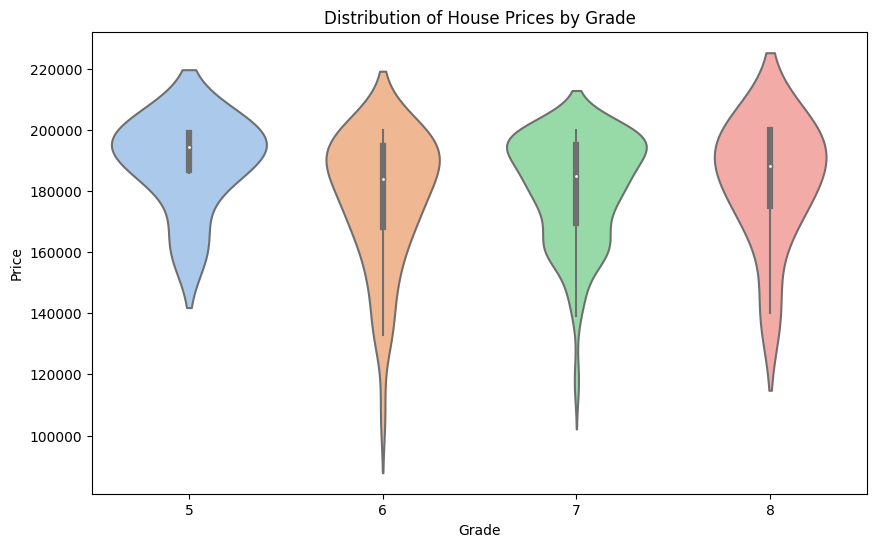

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='grade', y='price', data=new_df, palette='pastel')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Distribution of House Prices by Grade')
plt.show()




In [148]:
import plotly.graph_objs as go
import plotly.express as px

# URL for the GeoJSON data
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Filter the houses that are in grade 7 and 8
subset_houses = filtered_houses[filtered_houses['grade'].isin([8])]

# Create a scatter map using Plotly Express for the scatter points of the subset
scatter_points_subset = px.scatter_mapbox(subset_houses, lat='latitude', lon='longitude', color='price',
                                          size='price', size_max=20, color_continuous_scale="Viridis",
                                          range_color=(subset_houses['price'].min(), subset_houses['price'].max()),
                                          hover_name='house_id')

# Create a GeoJSON layer using Plotly Graph Objects
geojson_layer = go.Choroplethmapbox(geojson=url_geojson,
                                    locations=subset_houses['zipcode'],
                                    z=subset_houses['price'],
                                    hoverinfo='z',
                                    colorscale='Viridis',
                                    zmin=subset_houses['price'].min(),
                                    zmax=subset_houses['price'].max(),
                                    showscale=False)

# Count of houses shown
house_count = len(subset_houses)

# Combine scatter points and GeoJSON layer in a Figure
fig = go.Figure(data=[scatter_points_subset.data[0], geojson_layer])

# Add text annotation for house count
fig.add_annotation(
    x=0.5,
    y=1.05,
    text=f"Number of Houses (Grade 8): {house_count}",
    showarrow=False,
    font=dict(size=12)
)

# Update layout and show the map
fig.update_layout(width=900, height=900, mapbox_style="carto-positron",
                  mapbox_zoom=9,
                  mapbox_center={"lat": subset_houses['latitude'].mean(), "lon": subset_houses['longitude'].mean()},
                  title="Properties < 200.000 $, minimum 3 bedrooms, 2 bathrooms, Grade 8")
fig.show()


In [160]:
import plotly.graph_objs as go
import plotly.express as px

# URL for the GeoJSON data
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"


# interesting properties:
# 1443500305       property 1
# 5132000140  property 2
# Specify the house IDs you want to include in the subset
subset_house_ids = [5132000140, 1443500305]  

# Filter the data to include only the subset of house IDs
subset_houses = filtered_houses[filtered_houses['house_id'].isin(subset_house_ids)]

# Create a scatter map using Plotly Express for the scatter points of the subset
scatter_points_subset = px.scatter_mapbox(subset_houses, lat='latitude', lon='longitude', color='price',
                                          size='price', size_max=20, color_continuous_scale="Viridis",
                                          range_color=(subset_houses['price'].min(), subset_houses['price'].max()),
                                          hover_name='house_id',
                                          hover_data=['price', 'bedrooms', 'bathrooms'])

# Add the custom hover text
scatter_points_subset.update_traces(hovertemplate='House ID: %{hovertext}<br>' +
                                                   'Price: %{customdata[0]:,.2f}<br>' +
                                                   'Bedrooms: %{customdata[1]}<br>' +
                                                   'Bathrooms: %{customdata[2]}',
                                     hovertext=subset_houses['house_id'],
                                     customdata=subset_houses[['price', 'bedrooms', 'bathrooms']])

# Combine scatter points of the subset in a Figure
fig_subset = go.Figure(data=scatter_points_subset.data)

# Update layout and show the map
fig_subset.update_layout(mapbox_style="carto-positron",
                         mapbox_zoom=9,
                         mapbox_center={"lat": subset_houses['latitude'].mean(), "lon": subset_houses['longitude'].mean()},
                         title="Subset of Properties Scatter Map")
fig_subset.show()

In [155]:
import plotly.graph_objs as go
import plotly.express as px

# URL for the GeoJSON data
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

#421000285  268000.0       4.0        2.0      5    98056
#8989   3340401555  235000.0       4.0        2.0      5    98055
#15926  7227501170  235867.0       4.0        2.0      5    98056
#15929  7227501450  240000.0       4.0        2.0      5    98056
#15938  7227800055  199500.0       4.0        2.0      5    98056
#15939  7227800055  247000.0       4.0        2.0      5    98056
#15940  7227800065  199000.0       4.0        2.0      5    98056
#15944  7227801580  232000.0       4.0        2.0      5    98056
#15946  7227801630  275000.0       4.0        2.0      5    98056
#15947  7227801955 

# interesting properties:
# 1443500305       property 1
# 5132000140  property 2
# Specify the house IDs you want to include in the subset
subset_house_ids = [7227801955, 7227801630, 7227801580, 7227800065, 7227800055, 7227501450, 7227501170, 3340401555]  # Replace with the desired house IDs

# Filter the data to include only the subset of house IDs
subset_houses = filtered_houses[filtered_houses['house_id'].isin(subset_house_ids)]

# Create a scatter map using Plotly Express for the scatter points of the subset
scatter_points_subset = px.scatter_mapbox(subset_houses, lat='latitude', lon='longitude', color='price',
                                          size='price', size_max=20, color_continuous_scale="Viridis",
                                          range_color=(subset_houses['price'].min(), subset_houses['price'].max()),
                                          hover_name='house_id',
                                          hover_data=['price', 'bedrooms', 'bathrooms'])

# Add the custom hover text
scatter_points_subset.update_traces(hovertemplate='House ID: %{hovertext}<br>' +
                                                   'Price: %{customdata[0]:,.2f}<br>' +
                                                   'Bedrooms: %{customdata[1]}<br>' +
                                                   'Bathrooms: %{customdata[2]}',
                                     hovertext=subset_houses['house_id'],
                                     customdata=subset_houses[['price', 'bedrooms', 'bathrooms']])

# Combine scatter points of the subset in a Figure
fig_subset = go.Figure(data=scatter_points_subset.data)

# Update layout and show the map
fig_subset.update_layout(mapbox_style="carto-positron",
                         mapbox_zoom=9,
                         mapbox_center={"lat": subset_houses['latitude'].mean(), "lon": subset_houses['longitude'].mean()},
                         title="Subset of Properties Scatter Map")
fig_subset.show()


In [112]:
print(filtered_houses['zipcode'].unique())
print(df_geojson['features'][0]['properties']['ZIPCODE'])

[98178 98055 98042 98108 98002 98188 98146 98003 98023 98028 98092 98001
 98045 98168 98030 98022 98118 98133 98056 98198 98148 98031 98011 98010
 98106 98058 98103 98038 98059 98166 98052 98032 98019 98077 98126 98034
 98136 98109 98155 98008 98125 98144 98065 98014]


NameError: name 'df_geojson' is not defined

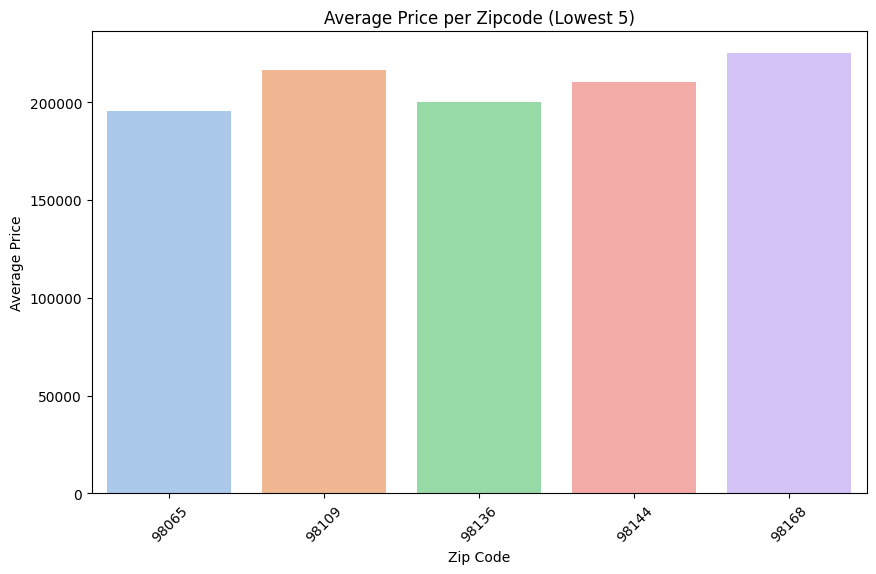

In [ ]:
sns.set_palette("pastel")

# Calculate average price per zipcode
avg_price_by_zip = filtered_houses.groupby('zipcode')['price'].mean().reset_index()

# Filter for the 5 zip codes with the lowest average prices
lowest_price_zips = avg_price_by_zip.nsmallest(5, 'price')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_price_zips, x='zipcode', y='price')
plt.title("Average Price per Zipcode (Lowest 5)")
plt.xlabel("Zip Code")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

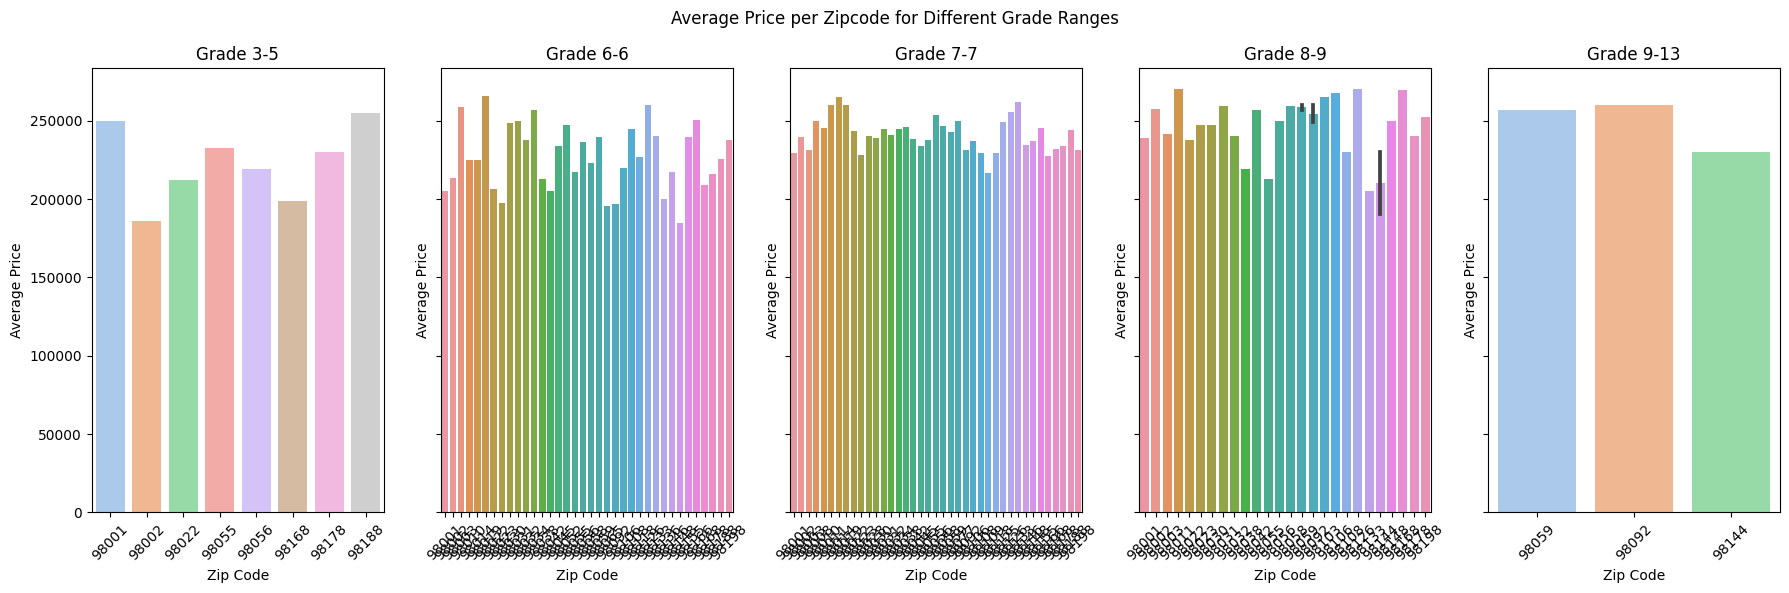

In [ ]:
sns.set_palette("pastel")

# Calculate average price per zipcode and grade
avg_price_by_zip_grade = filtered_houses.groupby(['zipcode', 'grade'])['price'].mean().reset_index()

# Create subplots for different grade ranges
grade_ranges = [(3, 5), (6,6), (7,7), (8, 9), (9, 13)]  
num_subplots = len(grade_ranges)

fig, axes = plt.subplots(1, num_subplots, figsize=(18, 6), sharey=True)
fig.suptitle("Average Price per Zipcode for Different Grade Ranges")

for i, (min_grade, max_grade) in enumerate(grade_ranges):
    subset_data = avg_price_by_zip_grade[(avg_price_by_zip_grade['grade'] >= min_grade) & (avg_price_by_zip_grade['grade'] <= max_grade)]
    
    ax = axes[i]
    sns.barplot(data=subset_data, x='zipcode', y='price', ax=ax)
    ax.set_title(f"Grade {min_grade}-{max_grade}")
    ax.set_xlabel("Zip Code")
    ax.set_ylabel("Average Price")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()

In [ ]:
# Create a scatter plot
scatter_plot = alt.Chart(filtered_houses).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('price:Q', scale=alt.Scale(range=[100, 1000]), title='Price'),
    color=alt.Color('grade:N', scale=alt.Scale(scheme='viridis'), title='Grade'),
    tooltip=[
        alt.Tooltip('price:Q', format='$,.2f'),  # Format price as currency with two decimal places
        alt.Tooltip('bedrooms:O'),
        alt.Tooltip('bathrooms:O'),
        alt.Tooltip('grade:N')
    ]
).properties(
    title='Geographical Distribution of Filtered Houses'
)

# Display the plot
scatter_plot


alt.Chart(...)

In [ ]:
import pandas as pd
import altair as alt
import json
import requests

# Load your dataset
df_house = pd.read_csv('data/eda.csv')

# Load GeoJSON file for Washington state zip codes
geojson_url = 'https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json'
response = requests.get(geojson_url)
geojson_data = json.loads(response.text)

# Convert GeoJSON features to a DataFrame
zip_code_features = geojson_data['features']
df_geojson = pd.DataFrame(zip_code_features)

# Extract the ZCTA5CE10 property from the properties dictionary
df_geojson['ZCTA5CE10'] = df_geojson['properties'].apply(lambda x: x['ZCTA5CE10'])

# Convert the zipcode column to string
df_house['zipcode'] = df_house['zipcode'].astype(str)

# Merge your data with GeoJSON data
df_merged = pd.merge(df_geojson, df_house, left_on='ZCTA5CE10', right_on='zipcode', how='left')

# Create an Altair GeoJSON data source
source = alt.Data(values=df_merged)

# Create the choropleth map
chart = alt.Chart(source).mark_geoshape(
    stroke='black',
    strokeWidth=0.5
).encode(
    color='price:Q',
    tooltip=[
        alt.Tooltip('ZCTA5CE10:N', title='Zip Code'),
        alt.Tooltip('price:Q', title='Average Price')
    ]
).project(
    type='identity',
    reflectY=True
).properties(
    width=500,
    height=300
).configure_view(
    strokeWidth=0
)

# Display the chart
chart.show()

# Save the visualization as an HTML file
#chart.save('geospatial_visualization.html')

ValueError: 'show' method requires the altair_viewer package. See http://github.com/altair-viz/altair_viewer

In [ ]:
import altair_viewer
altair_viewer.display(chart, inline=True)
import pandas as pd
import altair as alt
import json
import requests

# Geographical map using Altair
alt.data_transformers.disable_max_rows()  # To disable data size limit for Altair
alt.data_transformers.enable('json')  # To enable JSON data transformer

# Create a scatter plot on the map
scatter_map = alt.Chart(filtered_houses).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    size=alt.Size('price:Q', scale=alt.Scale(range=[100, 1000]), title='Price'),
    color=alt.Color('grade:N', scale=alt.Scale(scheme='viridis'), title='Grade'),
    tooltip=[
        alt.Tooltip('price:Q', format='$,.2f'),  # Format price as currency with two decimal places
        alt.Tooltip('bedrooms:O'),
        alt.Tooltip('bathrooms:O'),
        alt.Tooltip('grade:N')
    ]
).properties(
    title='Geographical Distribution of Filtered Houses'
)




# Show the map
scatter_map.save('scatter_map.html')  # Save the map as an HTML file

from IPython.display import IFrame
IFrame(src='scatter_map.html', width=800, height=600)


ModuleNotFoundError: No module named 'altair_viewer'